In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

# Registrar (resident) assessment

###### by Dr Juan H Klopper
<p>
###### This page contains an overview of the assessment of the registrars (residents) who completed time in the Acute Care Surgery Unit (ACSU) over the last weeks<sup>*</sup> (Drs A, B, C, D, and E).  It is our third objective assessment in the Unit and is meant to replace the subjective evaluation which is completed after each rotation and is deemd not fit-for-purpose by this Unit.
<p>
###### The scoring is based on four data sets, the first being the operative notes data set.  The second is constructed from the Jefferson scale of patient's perception of physician empathy and the third from a modified ward round assessment tool.  The last dataset is from the admissions and consultaions list.  Both scoring systems are validated and have been published in peer-review journals.  They are explained in more detail in the body of this document.
<p>
###### This is a static version of a Jupyter notebook, rendered in HTML for viewing in a web browser<sup>**</sup>.  The text for human reading is rendered in this gray type-font.  Code can be ignored, but results from code should be easy to identify and interpret.  Text usually accompanies code analysis and the rendering of figures.
<br>
###### Heading and subheadings are indicated as:
<br>
## Heading
### Subheading
<sup>*</sup> This notebook is for illustrative purposes only.  The names and numbers have been altered to ensure anonimity.
<sup>**</sup> The HTML rendered version is sent to Faculty.

Setup of intial python&#8482; environment

In [2]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
#import plotly as py
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale = 1.5)
from scipy.stats import chi2_contingency, ttest_ind, ranksums, bayes_mvs, probplot
import scikits.bootstrap as bs
#from bokeh.plotting import figure, show, output_notebook
from warnings import filterwarnings
filterwarnings('ignore')

## Data import

In [3]:
data = pd.read_excel('OP_NOTES_1_W.xlsx')

In [4]:
jefferson = pd.read_excel("Jefferson_1_W.xlsx")

In [5]:
mwrat = pd.read_excel("MWRAT_1_W.xlsx")

In [6]:
adm = pd.read_excel("Admissions_Consultation_1_W.xlsx")

## Descriptive statistics

### Patients seen

In [7]:
accounts = adm.Registrar.value_counts()
accounts

C    151
A    131
E    126
D    113
X     92
B     85
Name: Registrar, dtype: int64

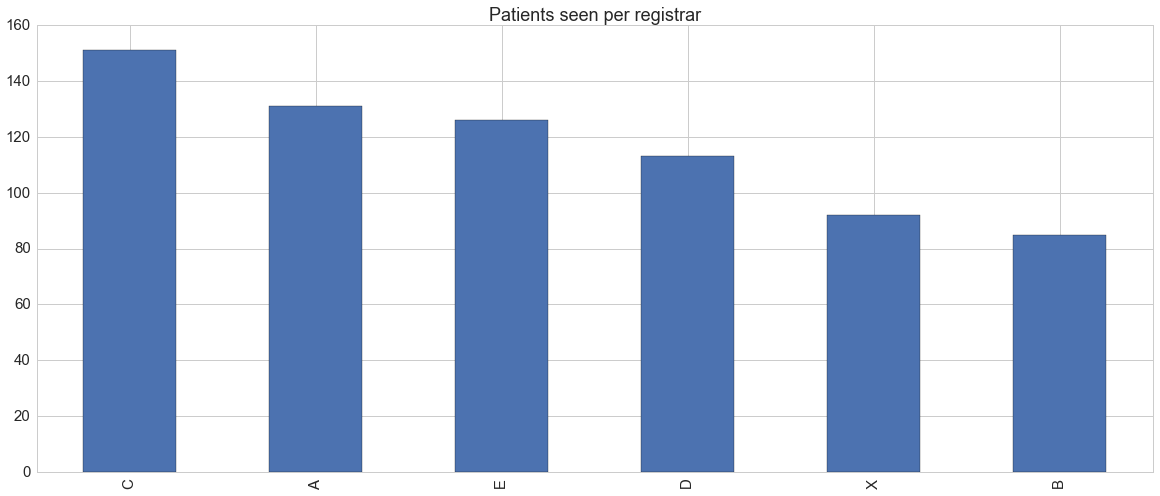

In [8]:
accounts.plot(kind = "bar", title = "Patients seen per registrar", figsize = (20, 8));

###### Dr C saw the most patients during the rotation.  Drs marked with X were either relief registrars (residents) or were still in the unit at the time of the change-over.

### Registrar as primary surgeon

In [9]:
data['Surgeon'].value_counts()

X    81
C    58
A    51
D    51
E    47
B    37
Name: Surgeon, dtype: int64

###### Dr C performed the most procedures as primary surgeon.

### Registrars as assistant

In [10]:
data['Assistant'].value_counts()

X    100
C     14
A     12
D     12
E      8
B      4
Name: Assistant, dtype: int64

###### Dr C again outperformed his colleagues and was present at surgery as assistent in 14 cases.

### Number of cases grouped by type

In [11]:
data.groupby("Nature")["Surgeon"].value_counts()

Nature     Surgeon
Elective   X          45
           C          23
           B          14
           D          12
           E          10
           A           9
Emergency  A          42
           D          39
           E          37
           X          36
           C          35
           B          23
dtype: int64

###### Dr C performed the most elective procedures and Dr A the most emergency cases.

### Procedures

###### Below follows a list of operative codes for the procedures performed over the last few weeks.  The key to the codes is produced in a seperate document.

In [12]:
data['Procedure'].value_counts()

DebMin                  35
GallCholeLap            29
AbsID                   22
IngHerniaOMU            20
LegAmpAKUC              17
LegAmpBKUC              15
AppOpenMid              14
LapExpR                 13
IncHerniaOM             12
AppOpen                 12
LegAmpSMUO              11
AppLap                  10
UmbHerniaOT              8
DebMaj                   8
LapExp                   7
FootAmpRay1U             6
ThyrLob                  5
LapAdhSBO                5
LapExpOmentop            4
IncHerniaOT              4
Lipomas                  4
LegAmpBKBC               4
LapResectSBASBO          3
IngHerniaTEPB            3
LapResectSBNSB           3
EUA                      3
LaparosExp               2
UmbHerniaOM              2
FootAmpRay2U             2
WartsCaut                2
                        ..
ColectomyRightO          2
IngHerniaOTU             2
LiverHydatidDeRoofS      1
IngHerniaOTUSBResect     1
ULGIE                    1
GallCholeOpen            1
T

### Emergency vs elective cases

######  The number of cases performed as emergencies and electives are given below.

In [13]:
data['Nature'].value_counts()

Emergency    212
Elective     113
Name: Nature, dtype: int64

### Types of emergency cases

###### The emergency procedures were colour-coded as given below.

In [14]:
data['Color'].value_counts()

Yellow    139
Orange     64
Green       7
Red         2
Name: Color, dtype: int64

### Types of anesthesia

###### The type of anesthesia is indicated below.

In [15]:
data['Anesthesia'].value_counts()

General              233
Regional              55
General, Local        29
General, Regional      4
Local                  2
Other                  2
Name: Anesthesia, dtype: int64

### Duration of operative procedures

###### Descriptive statistics of the duration of all procedures combined.

In [16]:
data.Duration.describe()

count    325.000000
mean      60.021538
std       37.820109
min        5.000000
25%       30.000000
50%       55.000000
75%       80.000000
max      200.000000
Name: Duration, dtype: float64

###### A duration distribution of all the cases combined is given below, followed by a box-and-whisker plot of the duration of the individual procedures.

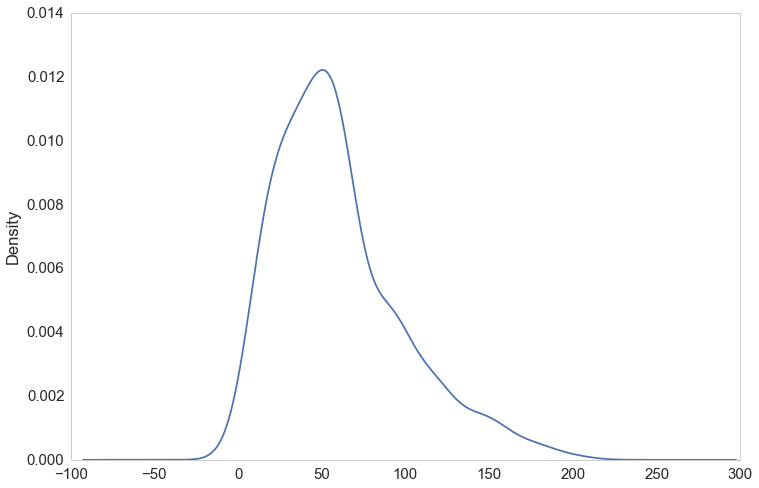

In [17]:
data.Duration.plot(kind = 'kde', figsize = (12, 8), grid = False);

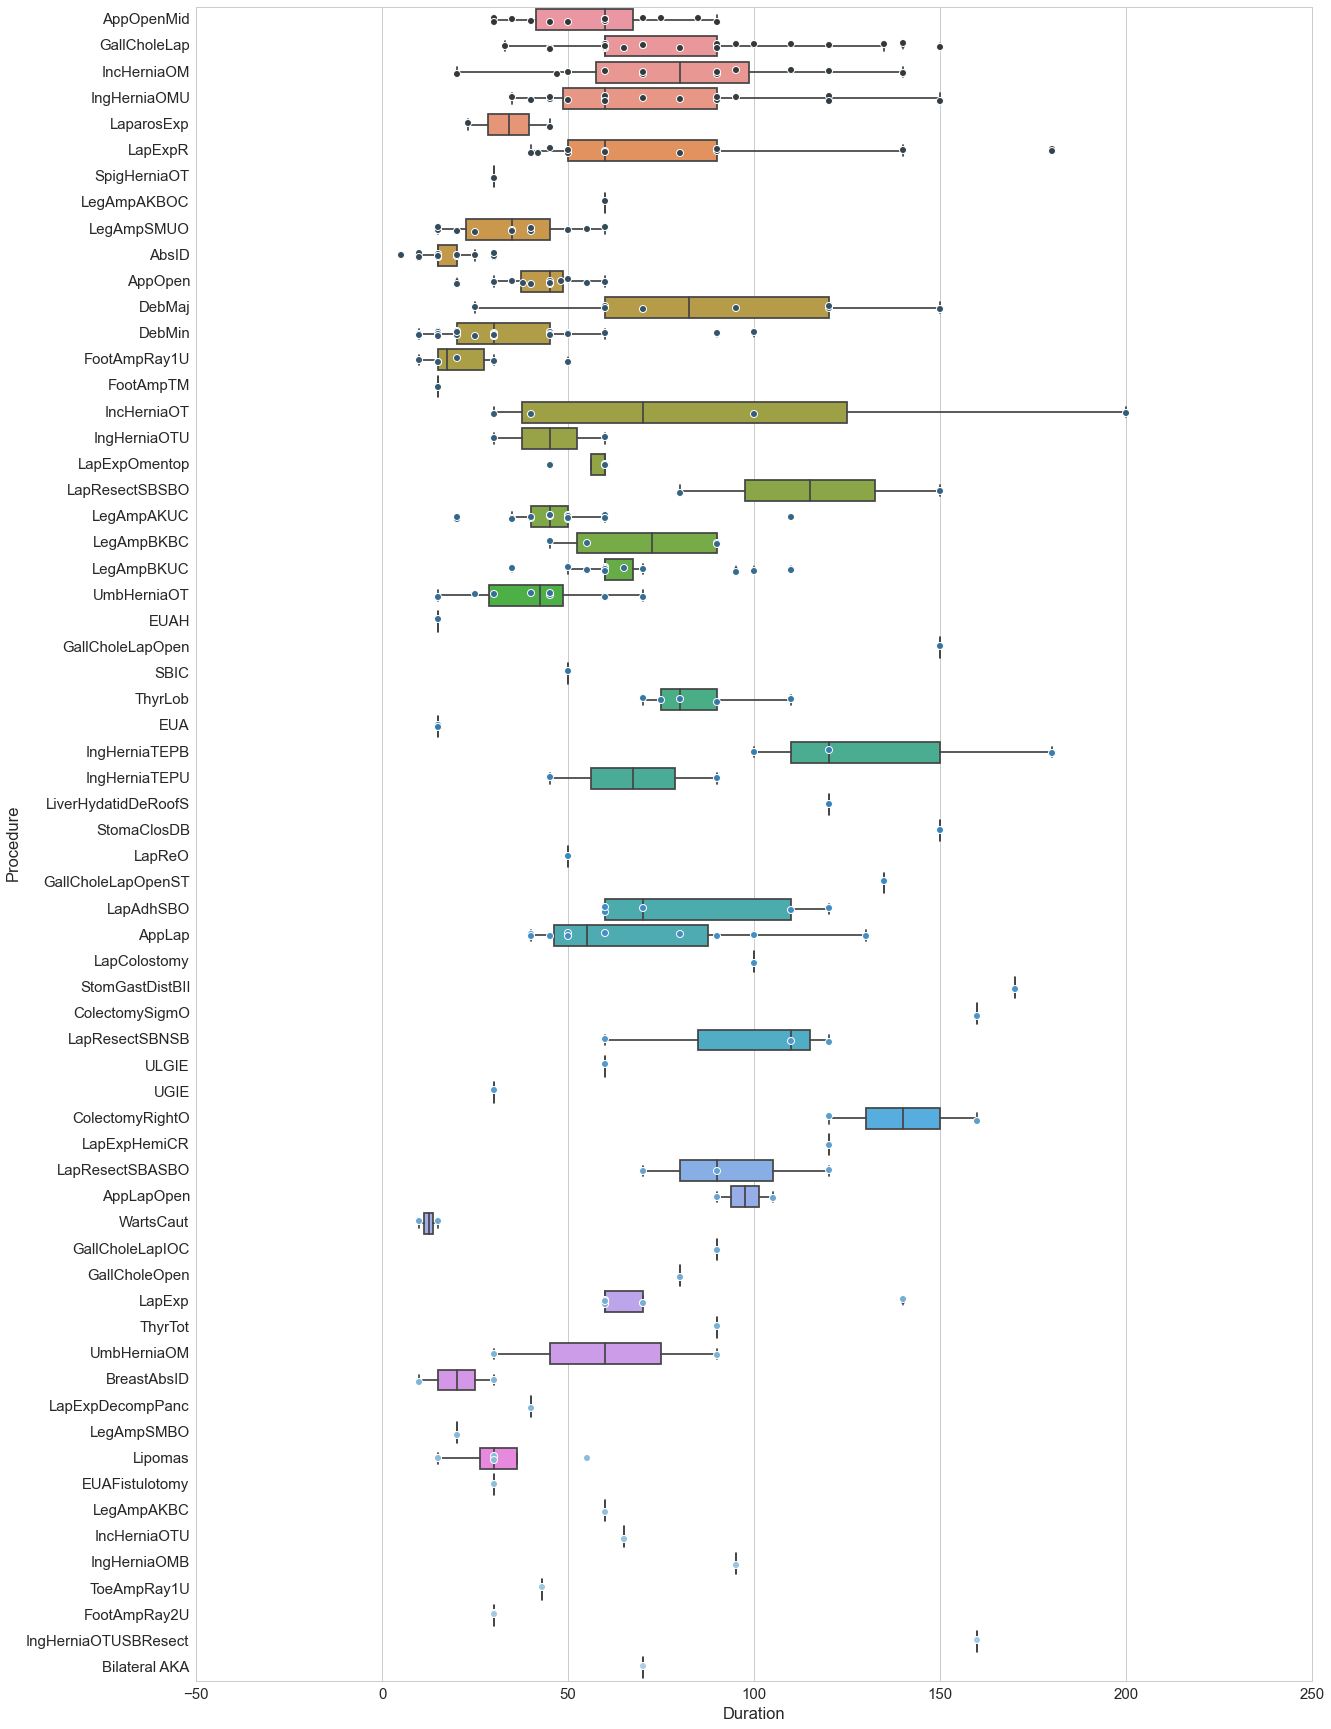

In [18]:
plt.figure(figsize = (20, 30))
sns.boxplot(y = 'Procedure', x = 'Duration', data = data, orient = 'h')
sns.stripplot(y = 'Procedure', x = 'Duration', data = data, orient = 'h', jitter = True, palette = 'Blues_d');

###### Descriptive statistics by nature of procedure (elective vs emergency).  

In [19]:
data.groupby('Nature')["Duration"].describe()

Nature          
Elective   count    113.000000
           mean      68.150442
           std       38.785634
           min       10.000000
           25%       43.000000
           50%       60.000000
           75%       90.000000
           max      180.000000
Emergency  count    212.000000
           mean      55.688679
           std       36.655528
           min        5.000000
           25%       30.000000
           50%       50.000000
           75%       70.000000
           max      200.000000
dtype: float64

### Duration by surgeon

###### Below we get an indication of the dispersion of the duration of each procedure for each registrar (resident).  The duration is perhaps the best proxy for the difficulty of a proceure.

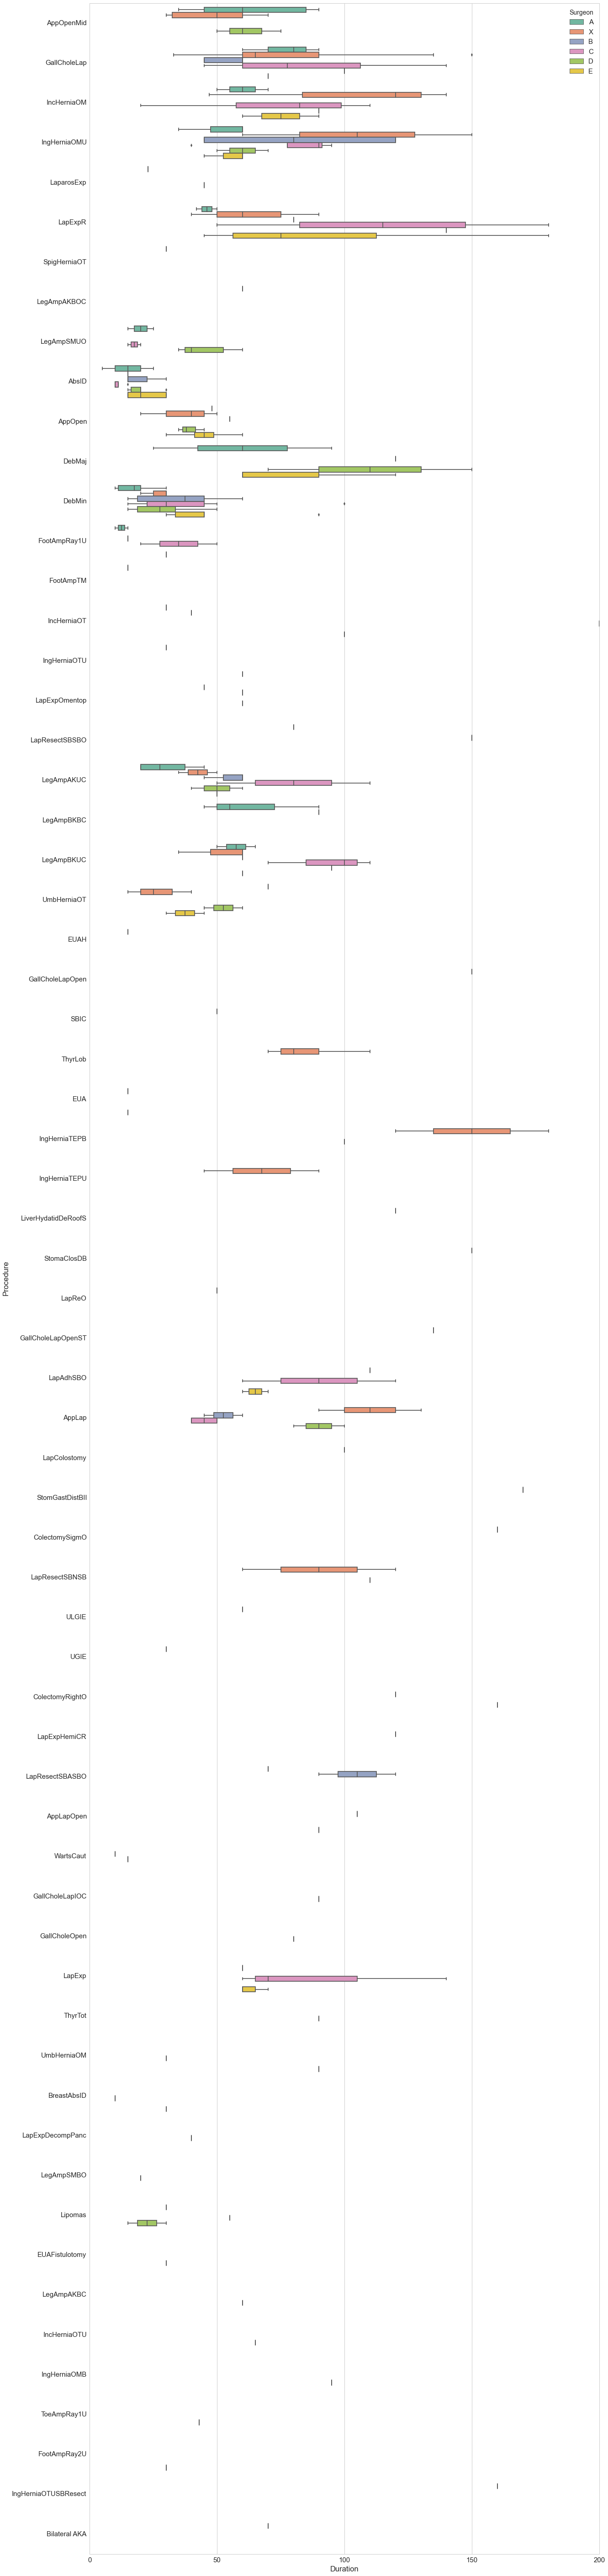

In [20]:
plt.figure(figsize = (20, 100))
sns.boxplot(x = 'Duration', y = "Procedure", hue = 'Surgeon', data = data, orient = 'h', palette = "Set2");

###### Below is a box-and-whisker plot for dispersion in operative times for all cases combined (for each registrar (resident)).

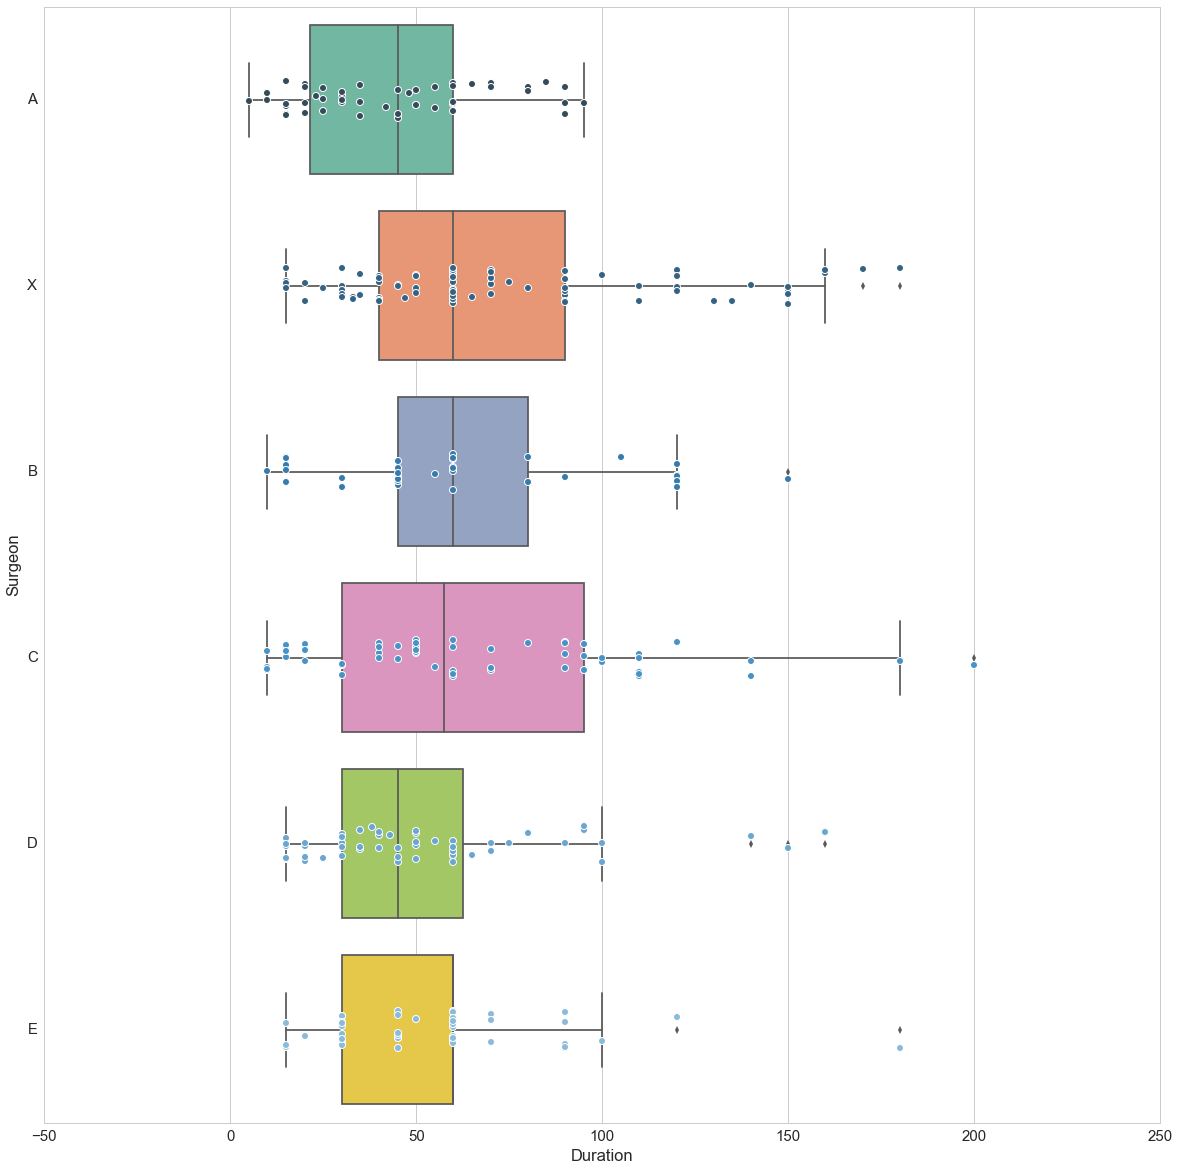

In [21]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = 'Duration', y = "Surgeon", data = data, orient = 'h', palette = "Set2")
sns.stripplot(x = 'Duration', y = "Surgeon", data = data, orient = 'h', jitter = True, palette = 'Blues_d');

### Jefferson scale of patient's perception of physician empathy

###### Performence of the registrars (residents) as a group according to our patients.

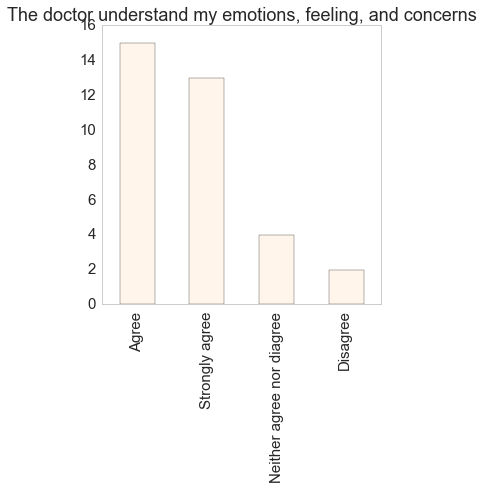

In [22]:
efc = jefferson['Emotions_feelings_concerns'].value_counts()
efc.plot(kind = 'bar', figsize = (5, 5), grid = False,
         colormap = cm.Oranges,
         title = 'The doctor understand my emotions, feeling, and concerns');

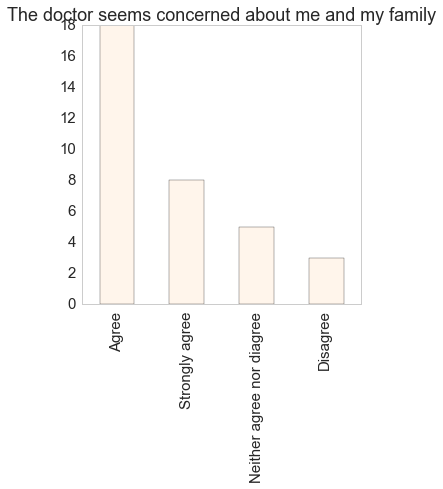

In [23]:
mf = jefferson['Me_family'].value_counts()
mf.plot(kind = 'bar', figsize = (5, 5), grid = False,
        colormap = cm.Oranges,
        title = 'The doctor seems concerned about me and my family');

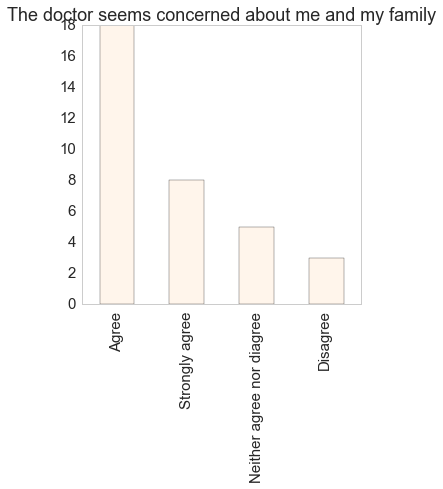

In [24]:
mf = jefferson['Me_family'].value_counts()
mf.plot(kind = 'bar', figsize = (5, 5), grid = False,
        colormap = cm.Oranges,
        title = 'The doctor seems concerned about me and my family');

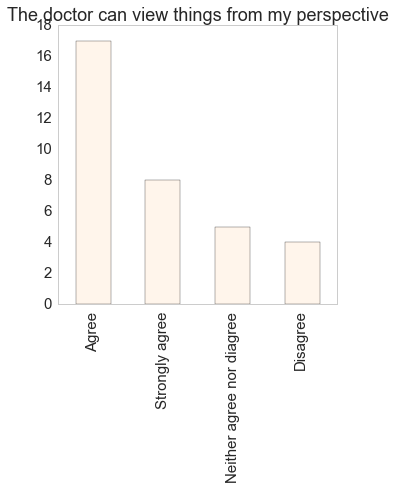

In [25]:
mp = jefferson['My_perspective'].value_counts()
mp.plot(kind = 'bar', figsize = (5, 5), grid = False,
        colormap = cm.Oranges,
        title = 'The doctor can view things from my perspective');

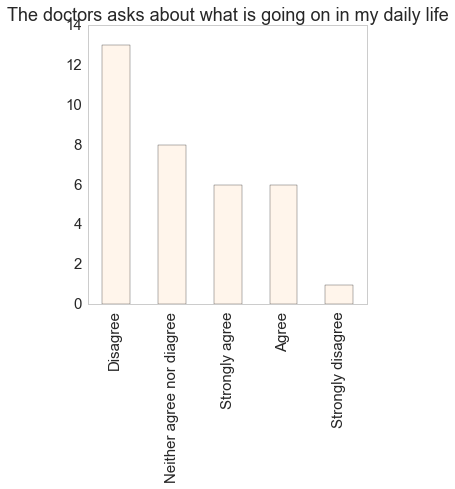

In [26]:
dl = jefferson['Daily_life'].value_counts()
dl.plot(kind = 'bar', figsize = (5, 5), grid = False,
        colormap = cm.Oranges,
        title = 'The doctors asks about what is going on in my daily life');

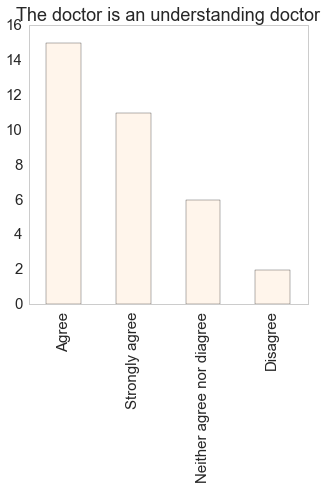

In [27]:
ud = jefferson['Understanding_doctor'].value_counts()
ud.plot(kind = 'bar', figsize = (5, 5), grid = False,
        colormap = cm.Oranges,
        title = 'The doctor is an understanding doctor');

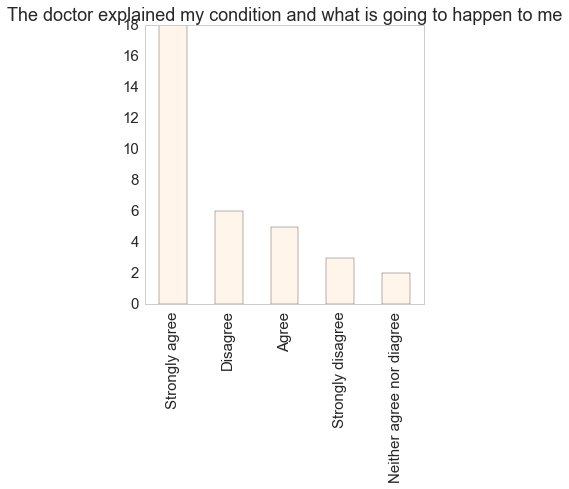

In [28]:
ch = jefferson['Condition_happen'].value_counts()
ch.plot(kind = 'bar', figsize = (5, 5), grid = False,
        colormap = cm.Oranges,
        title = 'The doctor explained my condition and what is going to happen to me');

###### Once again, the last pie chart above indicates that the registrars (residents) are still poor at properly our patients of their diseases and our management plans.

### Modified ward round assessment tool

###### The modified ward round assessment tool evaluates the registrars' (residents') performance at the bedside.  Days and cases are selected at random before the regisrars (residents) present them in the morning following a call.  Values are expressed as totals.

In [29]:
#mwrat.Registrar.value_counts()

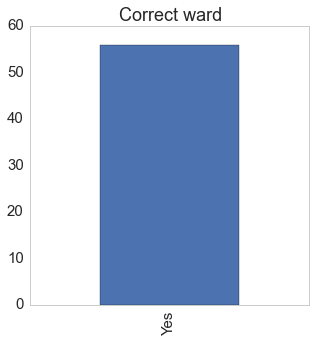

In [30]:
mwrat.Ward.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Correct ward');

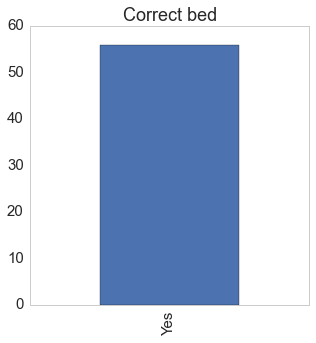

In [31]:
mwrat.Bed.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Correct bed');

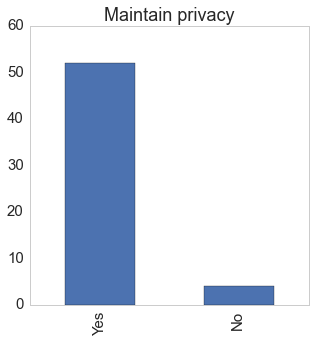

In [32]:
mwrat.Privacy.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Maintain privacy');

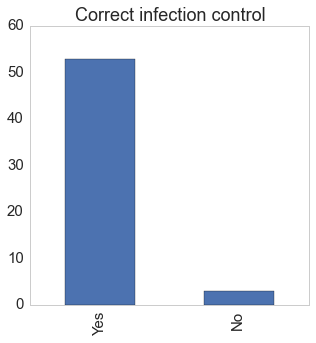

In [33]:
mwrat.Infection.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Correct infection control');

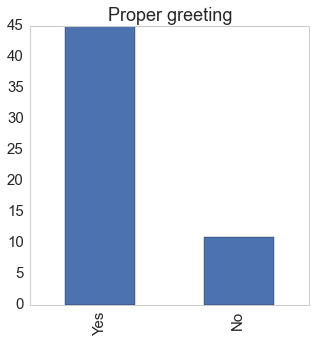

In [34]:
mwrat.Greeting.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Proper greeting');

In [35]:
mwrat.Identity.value_counts()

Yes    56
Name: Identity, dtype: int64

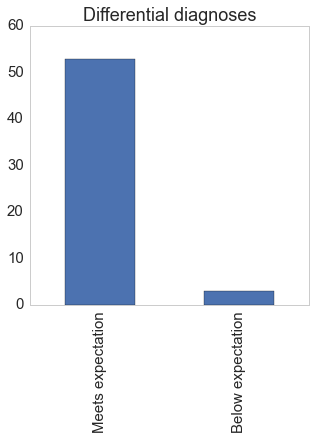

In [36]:
mwrat.Diagnosis.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Differential diagnoses');

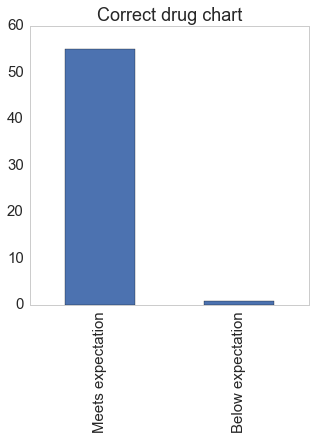

In [37]:
mwrat.Drugs.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Correct drug chart');

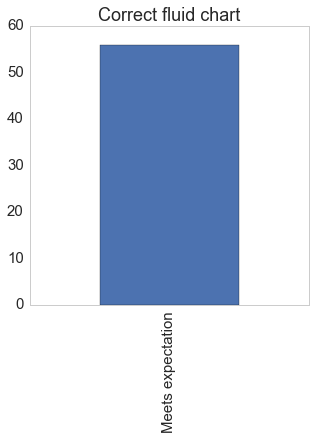

In [38]:
mwrat.Fluids.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Correct fluid chart');

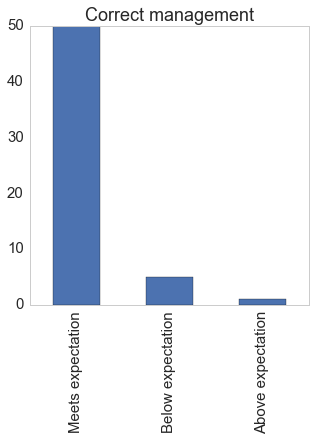

In [39]:
mwrat.Management.value_counts().plot(kind = 'bar', figsize = (5, 5), grid = False,
        title = 'Correct management');

## Evaluation by registrar

In [40]:
#data.Surgeon.value_counts()

In [41]:
data_C = data[data['Surgeon'] == 'C']
jefferson_C = jefferson[jefferson['Registrar'] == 'C']
mwrat_C = mwrat[mwrat['Registrar'] == 'C']

data_D = data[data['Surgeon'] == 'D']
jefferson_D = jefferson[jefferson['Registrar'] == 'D']
mwrat_D = mwrat[mwrat['Registrar'] == 'D']

data_E = data[data['Surgeon'] == 'E']
jefferson_E = jefferson[jefferson['Registrar'] == 'E']
mwrat_E = mwrat[mwrat['Registrar'] == 'E']

data_A = data[data['Surgeon'] == 'A']
jefferson_A = jefferson[jefferson['Registrar'] == 'A']
mwrat_A = mwrat[mwrat['Registrar'] == 'A']

data_B = data[data['Surgeon'] == 'B']
jefferson_B = jefferson[jefferson['Registrar'] == 'B']
mwrat_B = mwrat[mwrat['Registrar'] == 'B']

### Dr C

###### A breakdown of the procedures performed by Dr C as primary surgeon.

In [42]:
data_C.Procedure.value_counts()

DebMin              6
GallCholeLap        6
IngHerniaOMU        4
AppLap              4
AbsID               4
IncHerniaOM         4
LapExp              3
LegAmpBKUC          3
LegAmpAKUC          2
FootAmpRay1U        2
LapAdhSBO           2
LegAmpSMUO          2
LapExpR             2
LapResectSBNSB      1
IncHerniaOT         1
LaparosExp          1
GallCholeLapIOC     1
ThyrTot             1
UmbHerniaOM         1
LegAmpSMBO          1
Lipomas             1
BreastAbsID         1
WartsCaut           1
GallCholeOpen       1
LapExpOmentop       1
LapExpDecompPanc    1
IngHerniaTEPB       1
Name: Procedure, dtype: int64

###### A box-and-whisker plot of the spread in the duration of the various procedures performed by Dr C.

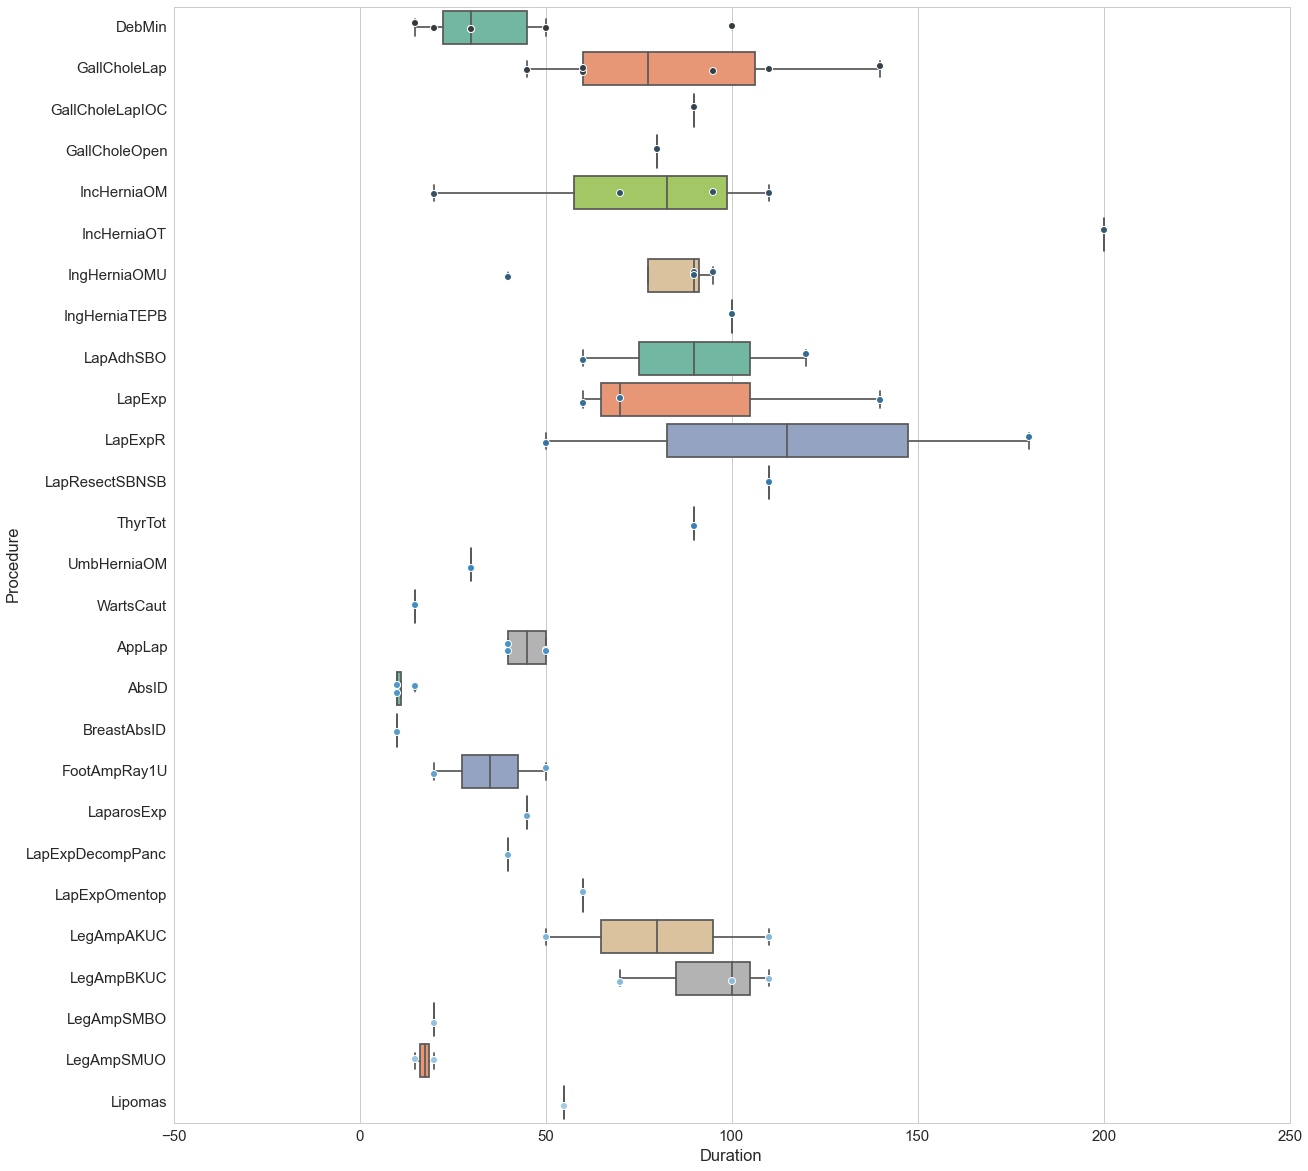

In [43]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = 'Duration', y = 'Procedure', data = data_C, orient = 'h', palette = 'Set2')
sns.stripplot(x = 'Duration', y = 'Procedure', data = data_C, orient = 'h', jitter = True, palette = 'Blues_d');

###### Dr C's performance on the Jefferson scale.

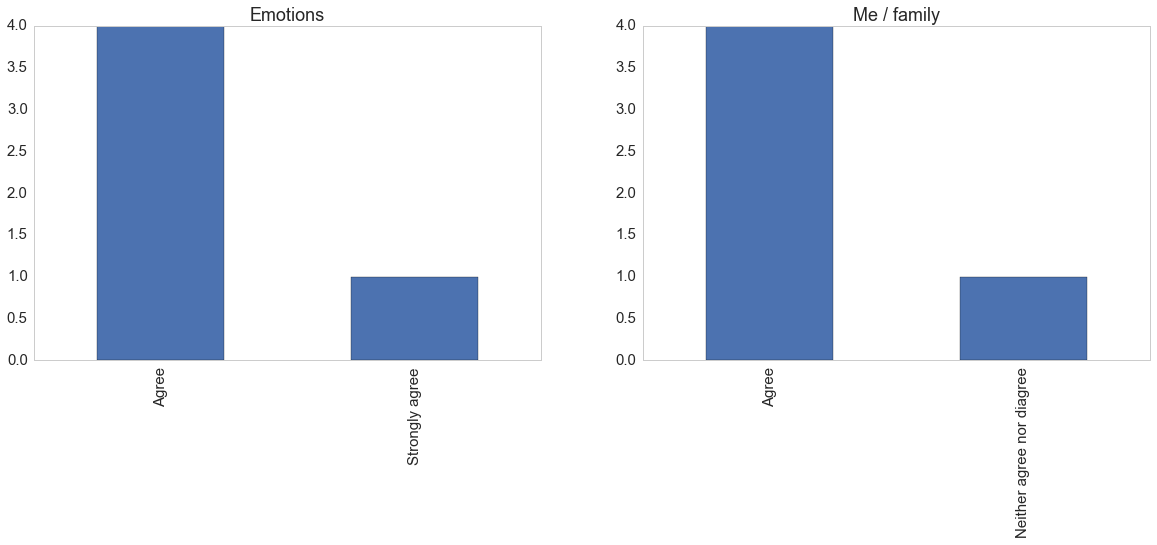

In [44]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_C['Emotions_feelings_concerns'].value_counts().plot(kind = 'bar', grid = False, title = 'Emotions')
fig.add_subplot(1, 2, 2)
jefferson_C['Me_family'].value_counts().plot(kind = 'bar', grid = False, title = 'Me / family');

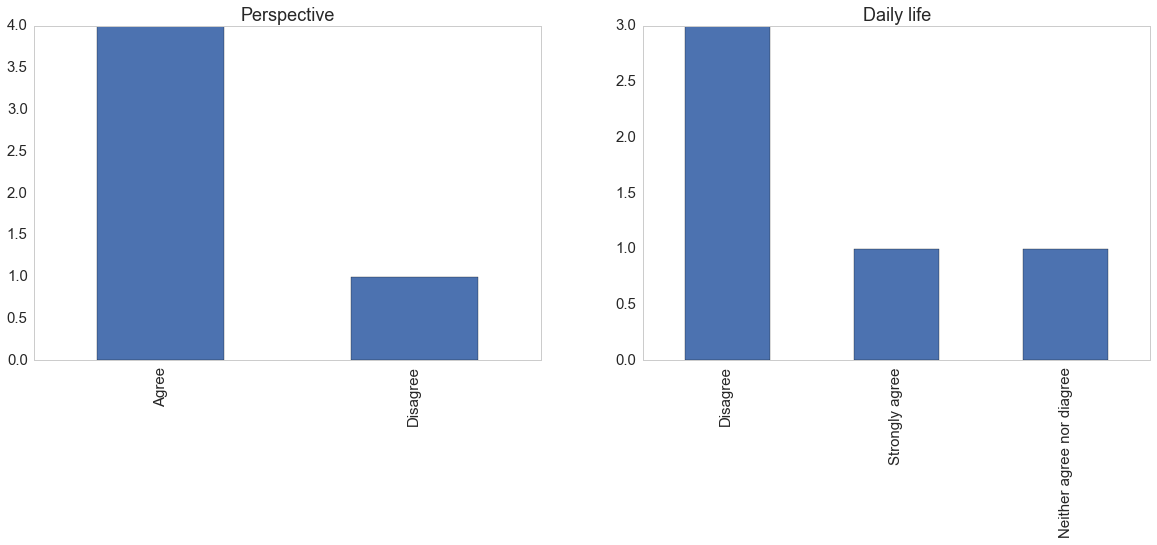

In [45]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_C['My_perspective'].value_counts().plot(kind = 'bar', grid = False, title = 'Perspective')
fig.add_subplot(1, 2, 2)
jefferson_C['Daily_life'].value_counts().plot(kind = 'bar', grid = False, title = 'Daily life');

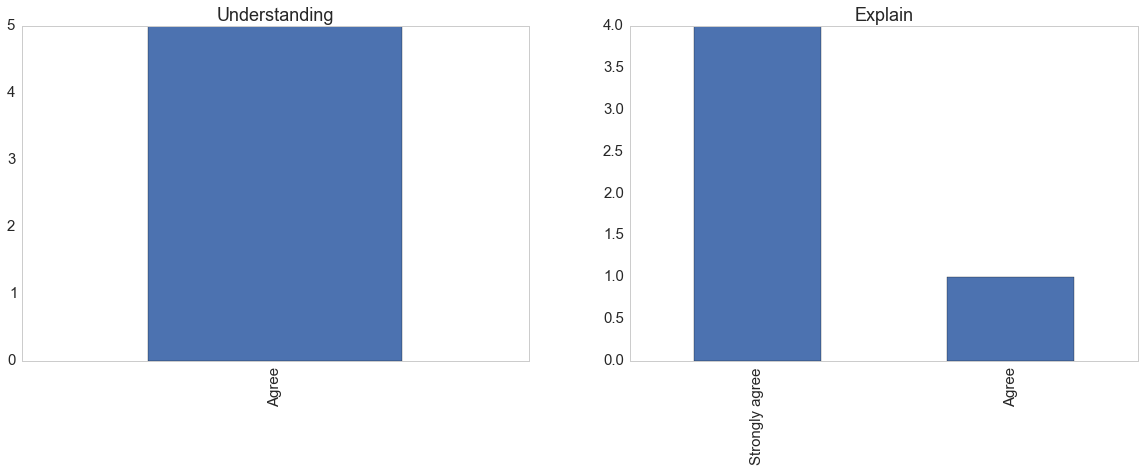

In [46]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_C['Understanding_doctor'].value_counts().plot(kind = 'bar', grid = False, title = 'Understanding')
fig.add_subplot(1, 2, 2)
jefferson_C['Condition_happen'].value_counts().plot(kind = 'bar', grid = False, title = 'Explain');

###### Dr C's performance on the modifed ward round assessment.

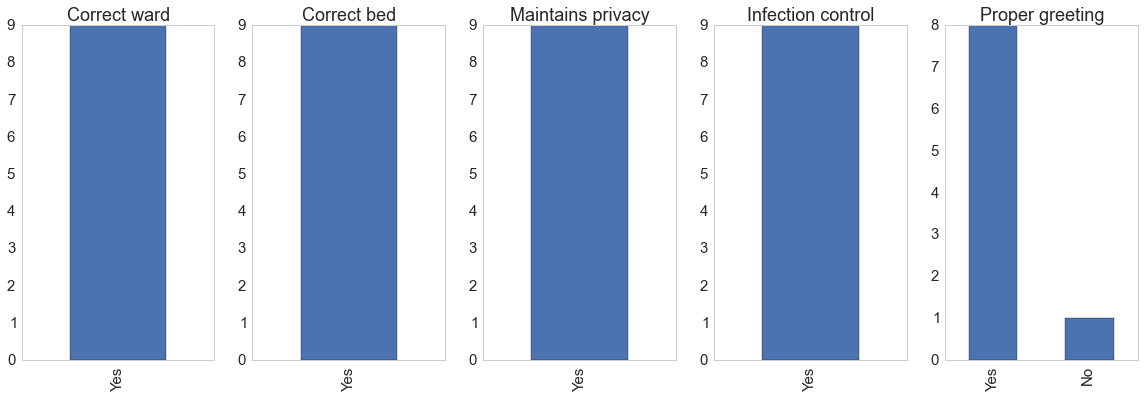

In [47]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_C['Ward'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct ward')
fig.add_subplot(1, 5, 2)
mwrat_C['Bed'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct bed')
fig.add_subplot(1, 5, 3)
mwrat_C['Privacy'].value_counts().plot(kind = 'bar', grid = False, title = 'Maintains privacy')
fig.add_subplot(1, 5, 4)
mwrat_C['Infection'].value_counts().plot(kind = 'bar', grid = False, title = 'Infection control')
fig.add_subplot(1, 5, 5)
mwrat_C['Greeting'].value_counts().plot(kind = 'bar', grid = False, title = 'Proper greeting');

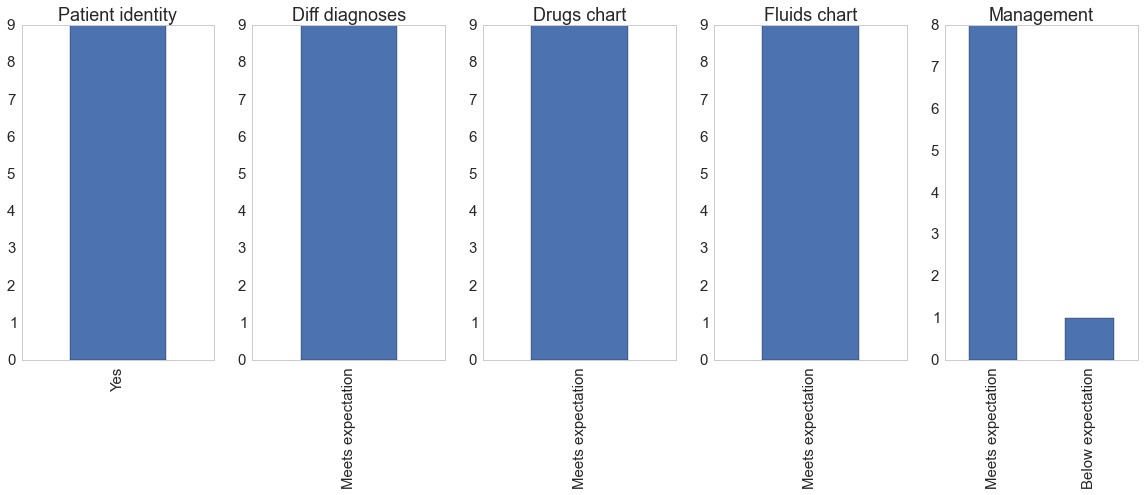

In [48]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_C['Identity'].value_counts().plot(kind = 'bar', grid = False, title = 'Patient identity')
fig.add_subplot(1, 5, 2)
mwrat_C['Diagnosis'].value_counts().plot(kind = 'bar', grid = False, title = 'Diff diagnoses')
fig.add_subplot(1, 5, 3)
mwrat_C['Drugs'].value_counts().plot(kind = 'bar', grid = False, title = 'Drugs chart')
fig.add_subplot(1, 5, 4)
mwrat_C['Fluids'].value_counts().plot(kind = 'bar', grid = False, title = 'Fluids chart')
fig.add_subplot(1, 5, 5)
mwrat_C['Management'].value_counts().plot(kind = 'bar', grid = False, title = 'Management');

### Dr D

###### A breakdown of the procedures performed by Dr D as primary surgeon.

In [49]:
data_D['Procedure'].value_counts()

DebMin             8
LegAmpSMUO         7
AbsID              6
AppOpen            3
LegAmpAKUC         3
AppOpenMid         3
IngHerniaOMU       3
Lipomas            2
DebMaj             2
AppLap             2
UmbHerniaOT        2
EUAFistulotomy     1
ToeAmpRay1U        1
LegAmpBKUC         1
LegAmpAKBC         1
IncHerniaOTU       1
GallCholeLap       1
IncHerniaOM        1
IngHerniaOMB       1
LapExpR            1
ColectomyRightO    1
Name: Procedure, dtype: int64

###### A box-and-whisker plot of the spread in the duration of the various procedures performed by Dr D.

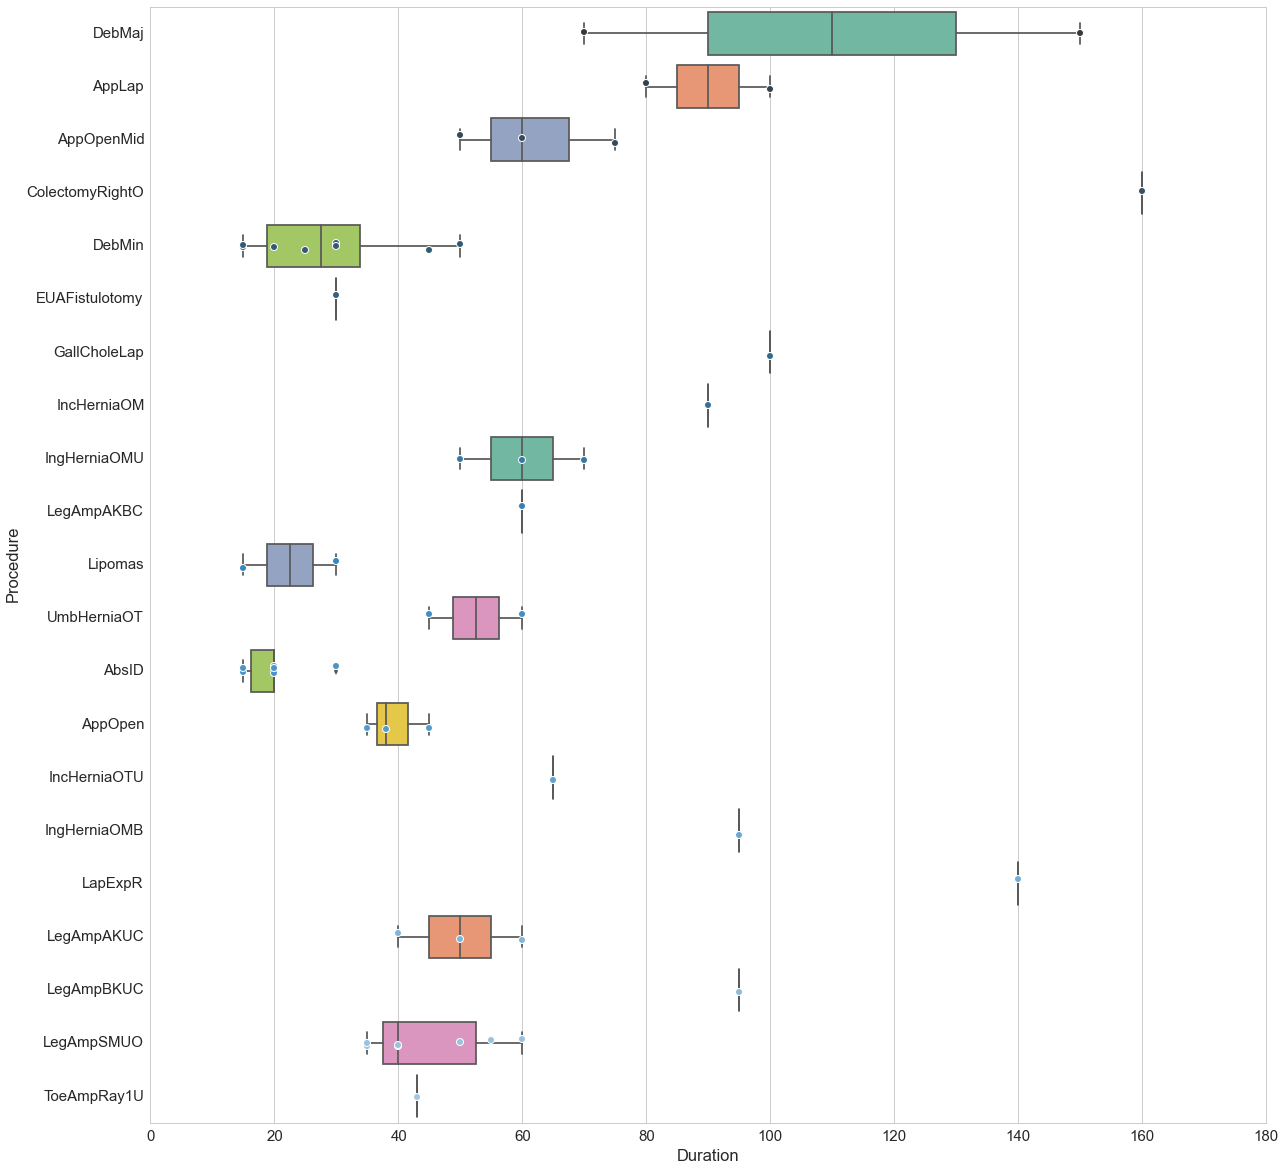

In [50]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = 'Duration', y = 'Procedure', data = data_D, orient = 'h', palette = 'Set2')
sns.stripplot(x = 'Duration', y = 'Procedure', data = data_D, orient = 'h', jitter = True, palette = 'Blues_d');

###### Dr D's performance on the Jefferson scale.

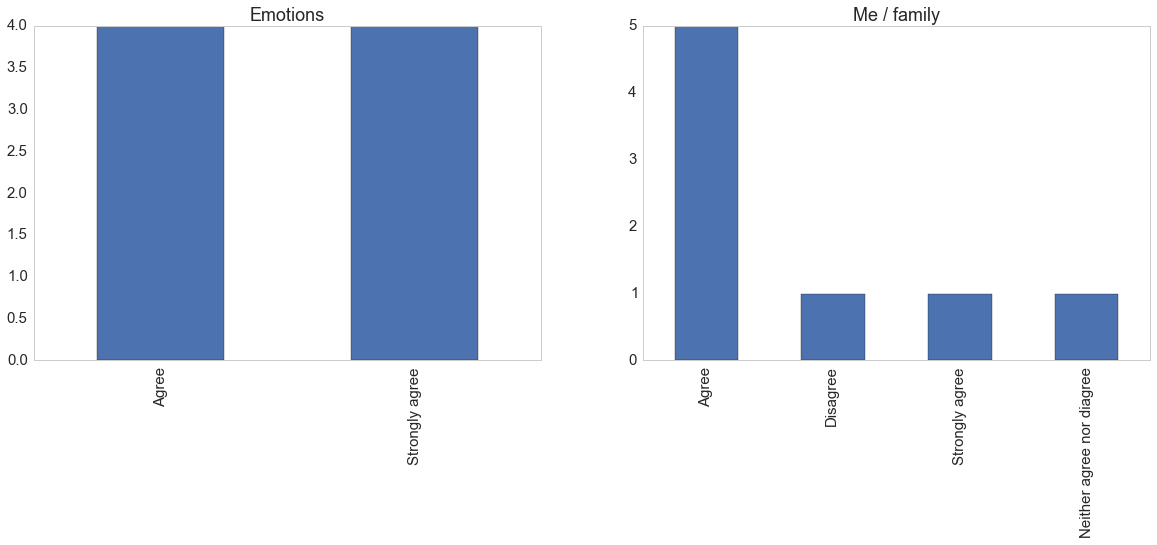

In [51]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_D['Emotions_feelings_concerns'].value_counts().plot(kind = 'bar', grid = False, title = 'Emotions')
fig.add_subplot(1, 2, 2)
jefferson_D['Me_family'].value_counts().plot(kind = 'bar', grid = False, title = 'Me / family')

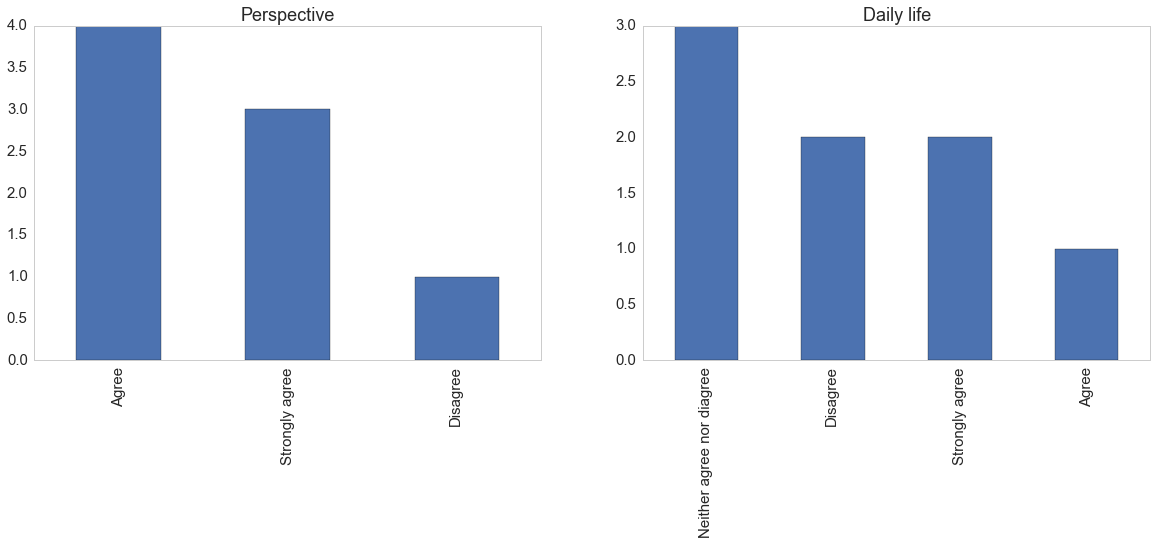

In [52]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_D['My_perspective'].value_counts().plot(kind = 'bar', grid = False, title = 'Perspective')
fig.add_subplot(1, 2, 2)
jefferson_D['Daily_life'].value_counts().plot(kind = 'bar', grid = False, title = 'Daily life');

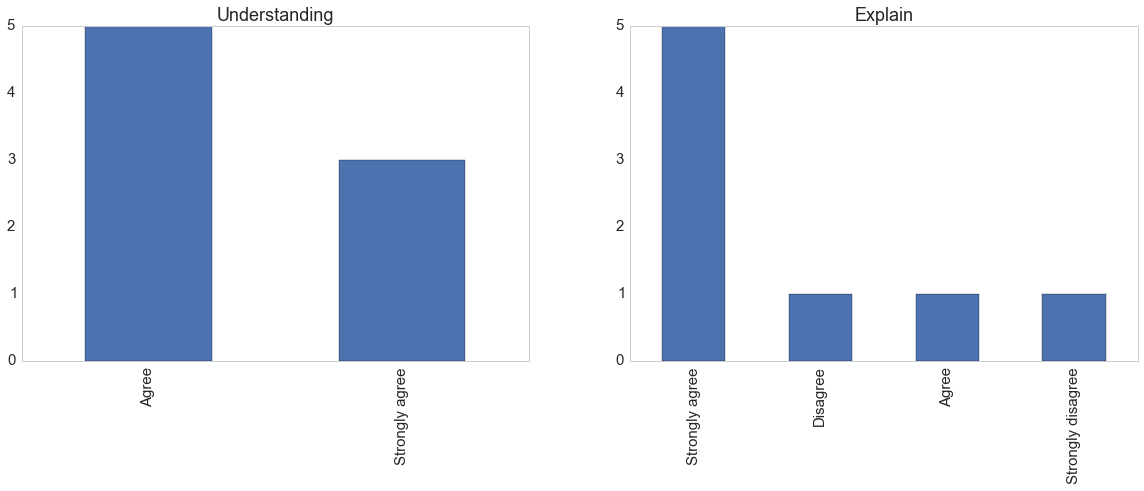

In [53]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_D['Understanding_doctor'].value_counts().plot(kind = 'bar', grid = False, title = 'Understanding')
fig.add_subplot(1, 2, 2)
jefferson_D['Condition_happen'].value_counts().plot(kind = 'bar', grid = False, title = 'Explain');

###### Dr D's performance on the modifed ward round assessment.

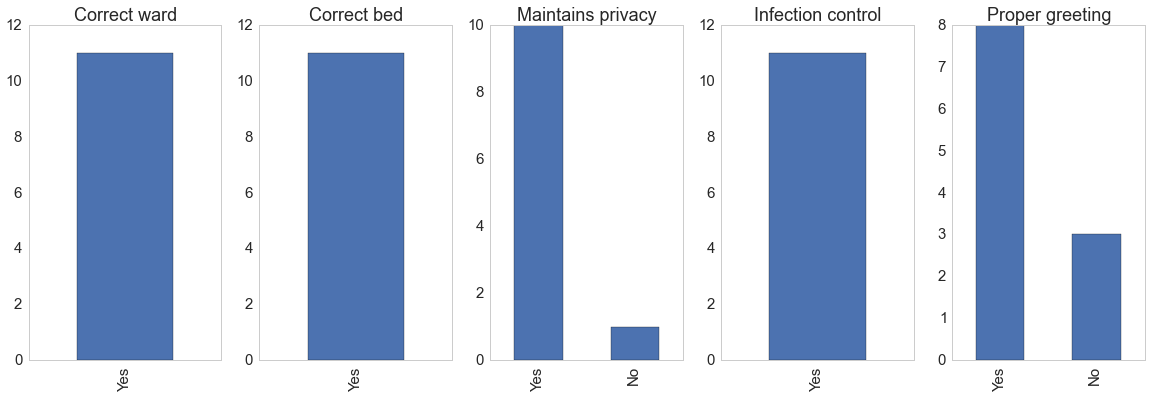

In [54]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_D['Ward'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct ward')
fig.add_subplot(1, 5, 2)
mwrat_D['Bed'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct bed')
fig.add_subplot(1, 5, 3)
mwrat_D['Privacy'].value_counts().plot(kind = 'bar', grid = False, title = 'Maintains privacy')
fig.add_subplot(1, 5, 4)
mwrat_D['Infection'].value_counts().plot(kind = 'bar', grid = False, title = 'Infection control')
fig.add_subplot(1, 5, 5)
mwrat_D['Greeting'].value_counts().plot(kind = 'bar', grid = False, title = 'Proper greeting');

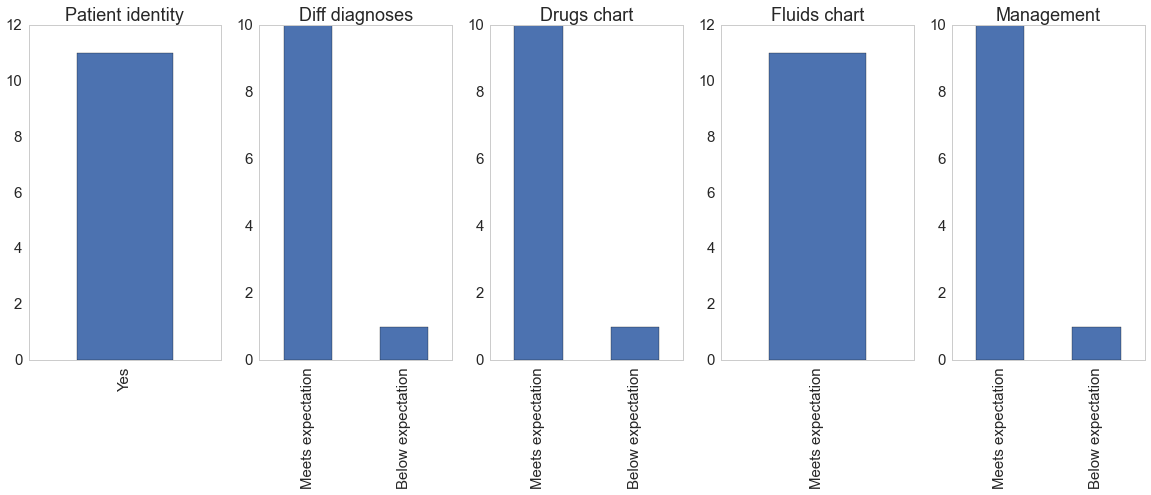

In [55]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_D['Identity'].value_counts().plot(kind = 'bar', grid = False, title = 'Patient identity')
fig.add_subplot(1, 5, 2)
mwrat_D['Diagnosis'].value_counts().plot(kind = 'bar', grid = False, title = 'Diff diagnoses')
fig.add_subplot(1, 5, 3)
mwrat_D['Drugs'].value_counts().plot(kind = 'bar', grid = False, title = 'Drugs chart')
fig.add_subplot(1, 5, 4)
mwrat_D['Fluids'].value_counts().plot(kind = 'bar', grid = False, title = 'Fluids chart')
fig.add_subplot(1, 5, 5)
mwrat_D['Management'].value_counts().plot(kind = 'bar', grid = False, title = 'Management');

### Dr E

###### A breakdown of the procedures performed by Dr E as primary surgeon.

In [56]:
data_E.Procedure.value_counts()

DebMin          6
AbsID           5
LapExpR         4
AppOpen         4
IngHerniaOMU    3
DebMaj          3
LapExp          3
FootAmpRay2U    2
LapAdhSBO       2
IncHerniaOM     2
UmbHerniaOT     2
LegAmpBKUC      2
IngHerniaOTU    1
LegAmpAKUC      1
UmbHerniaOM     1
FootAmpRay1U    1
AppLapOpen      1
GallCholeLap    1
IncHerniaOT     1
EUA             1
BreastAbsID     1
Name: Procedure, dtype: int64

###### A box-and-whisker plot of the spread in the duration of the various procedures performed by Dr E.

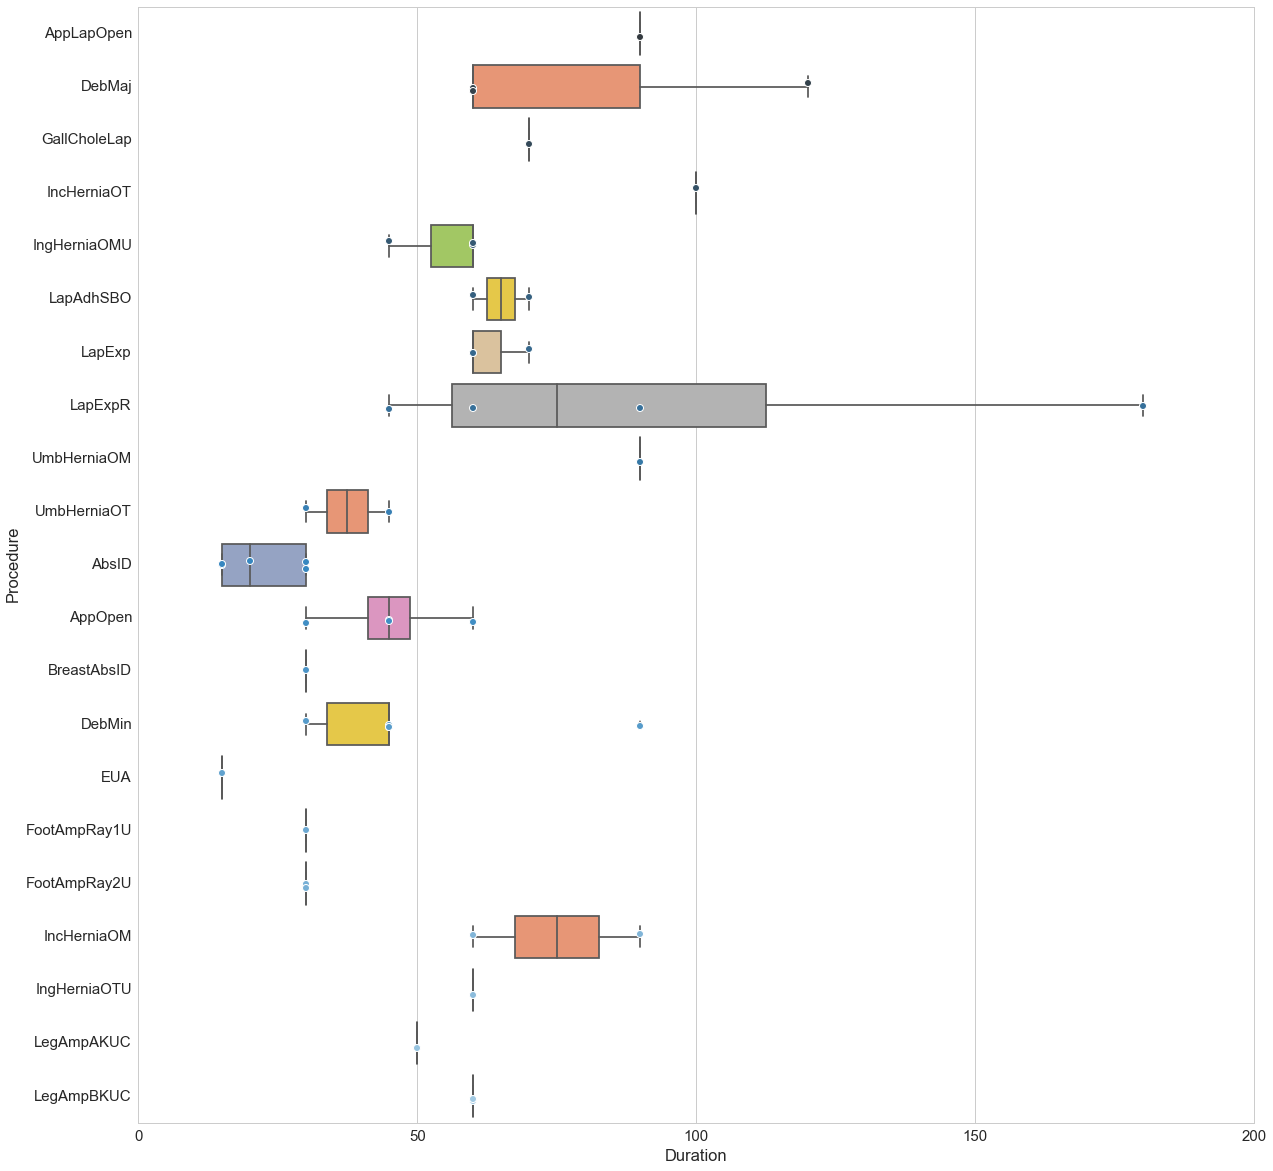

In [57]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = 'Duration', y = 'Procedure', data = data_E, orient = 'h', palette = 'Set2')
sns.stripplot(x = 'Duration', y = 'Procedure', data = data_E, orient = 'h', jitter = True, palette = 'Blues_d');

###### Dr E's performance on the Jefferson scale.

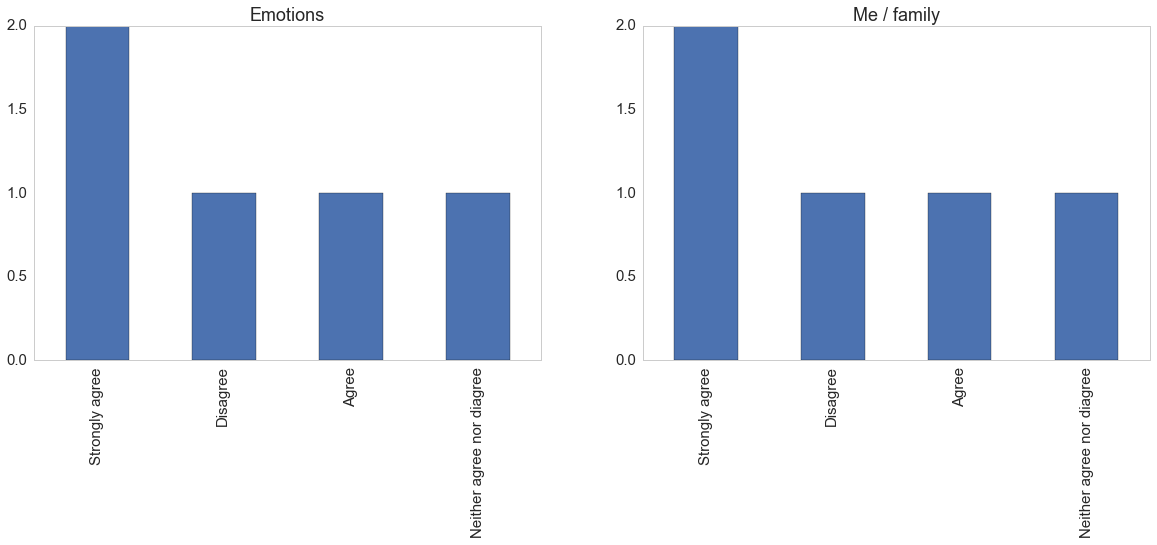

In [58]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_E['Emotions_feelings_concerns'].value_counts().plot(kind = 'bar', grid = False, title = 'Emotions')
fig.add_subplot(1, 2, 2)
jefferson_E['Me_family'].value_counts().plot(kind = 'bar', grid = False, title = 'Me / family');

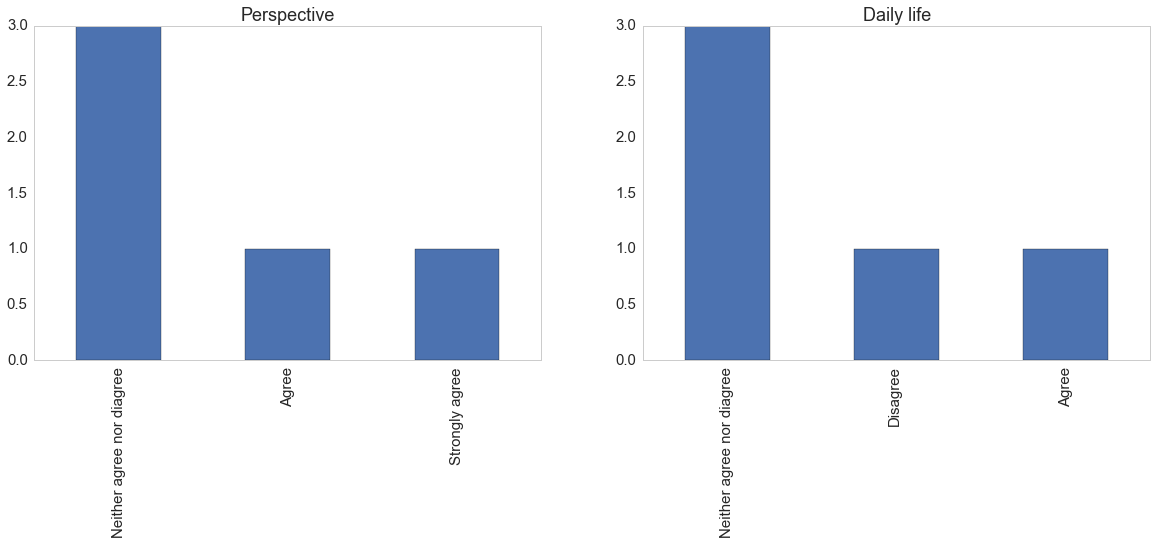

In [59]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_E['My_perspective'].value_counts().plot(kind = 'bar', grid = False, title = 'Perspective')
fig.add_subplot(1, 2, 2)
jefferson_E['Daily_life'].value_counts().plot(kind = 'bar', grid = False, title = 'Daily life');

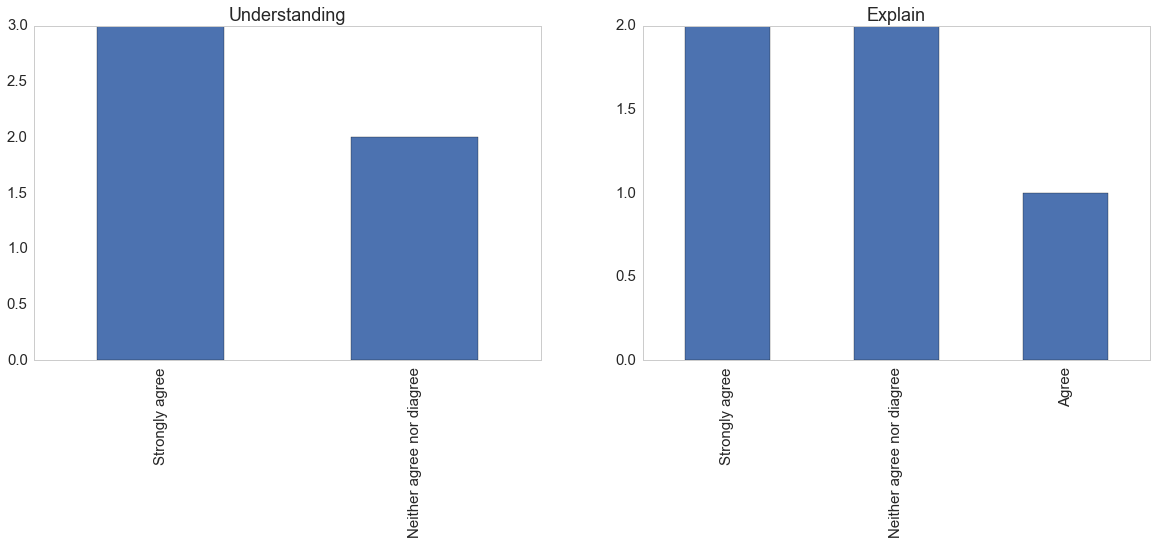

In [60]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_E['Understanding_doctor'].value_counts().plot(kind = 'bar', grid = False, title = 'Understanding')
fig.add_subplot(1, 2, 2)
jefferson_E['Condition_happen'].value_counts().plot(kind = 'bar', grid = False, title = 'Explain');

###### Dr E's performance on the modifed ward round assessment.

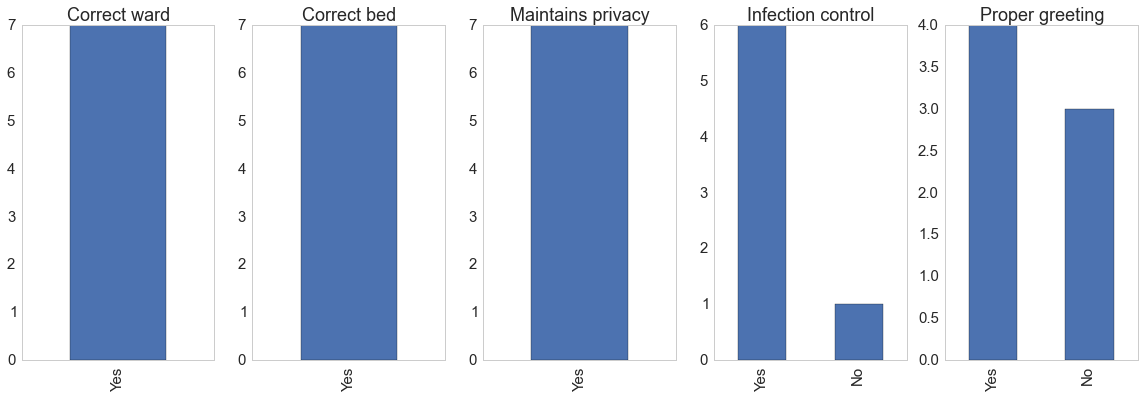

In [61]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_E['Ward'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct ward')
fig.add_subplot(1, 5, 2)
mwrat_E['Bed'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct bed')
fig.add_subplot(1, 5, 3)
mwrat_E['Privacy'].value_counts().plot(kind = 'bar', grid = False, title = 'Maintains privacy')
fig.add_subplot(1, 5, 4)
mwrat_E['Infection'].value_counts().plot(kind = 'bar', grid = False, title = 'Infection control')
fig.add_subplot(1, 5, 5)
mwrat_E['Greeting'].value_counts().plot(kind = 'bar', grid = False, title = 'Proper greeting');

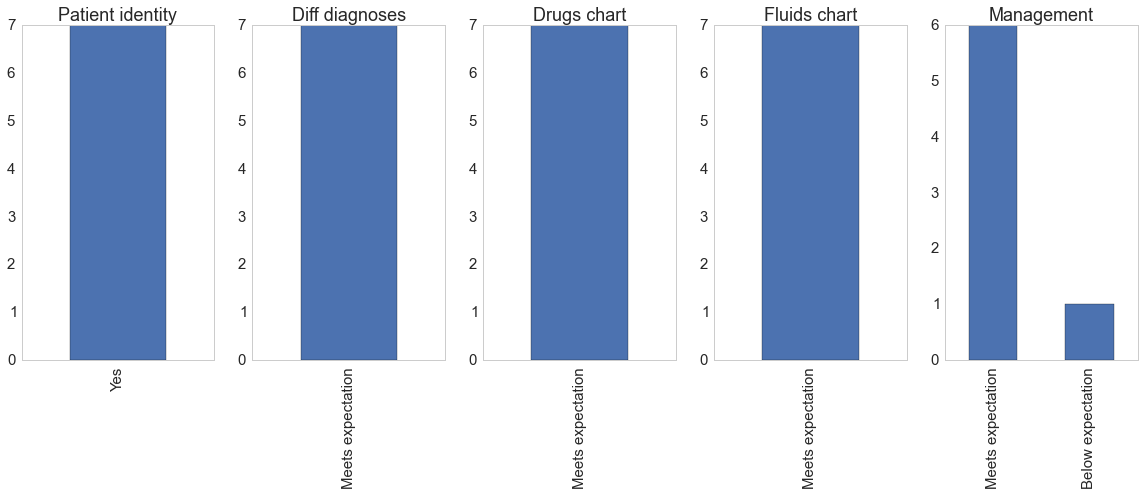

In [62]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_E['Identity'].value_counts().plot(kind = 'bar', grid = False, title = 'Patient identity')
fig.add_subplot(1, 5, 2)
mwrat_E['Diagnosis'].value_counts().plot(kind = 'bar', grid = False, title = 'Diff diagnoses')
fig.add_subplot(1, 5, 3)
mwrat_E['Drugs'].value_counts().plot(kind = 'bar', grid = False, title = 'Drugs chart')
fig.add_subplot(1, 5, 4)
mwrat_E['Fluids'].value_counts().plot(kind = 'bar', grid = False, title = 'Fluids chart')
fig.add_subplot(1, 5, 5)
mwrat_E['Management'].value_counts().plot(kind = 'bar', grid = False, title = 'Management');

### Dr A

###### A breakdown of the procedures performed by Dr A as primary surgeon.

In [63]:
data_A.Procedure.value_counts()

DebMin            6
AppOpenMid        5
LegAmpAKUC        4
LegAmpBKUC        4
GallCholeLap      3
LegAmpBKBC        3
AbsID             3
IngHerniaOMU      3
LapExpR           2
IncHerniaOM       2
LegAmpSMUO        2
DebMaj            2
FootAmpRay1U      2
FootAmpTM         1
LegAmpAKBOC       1
SpigHerniaOT      1
AppOpen           1
IngHerniaOTU      1
UmbHerniaOT       1
LapExpOmentop     1
LapResectSBSBO    1
IncHerniaOT       1
LaparosExp        1
Name: Procedure, dtype: int64

###### A box-and-whisker plot of the spread in the duration of the various procedures performed by Dr A.

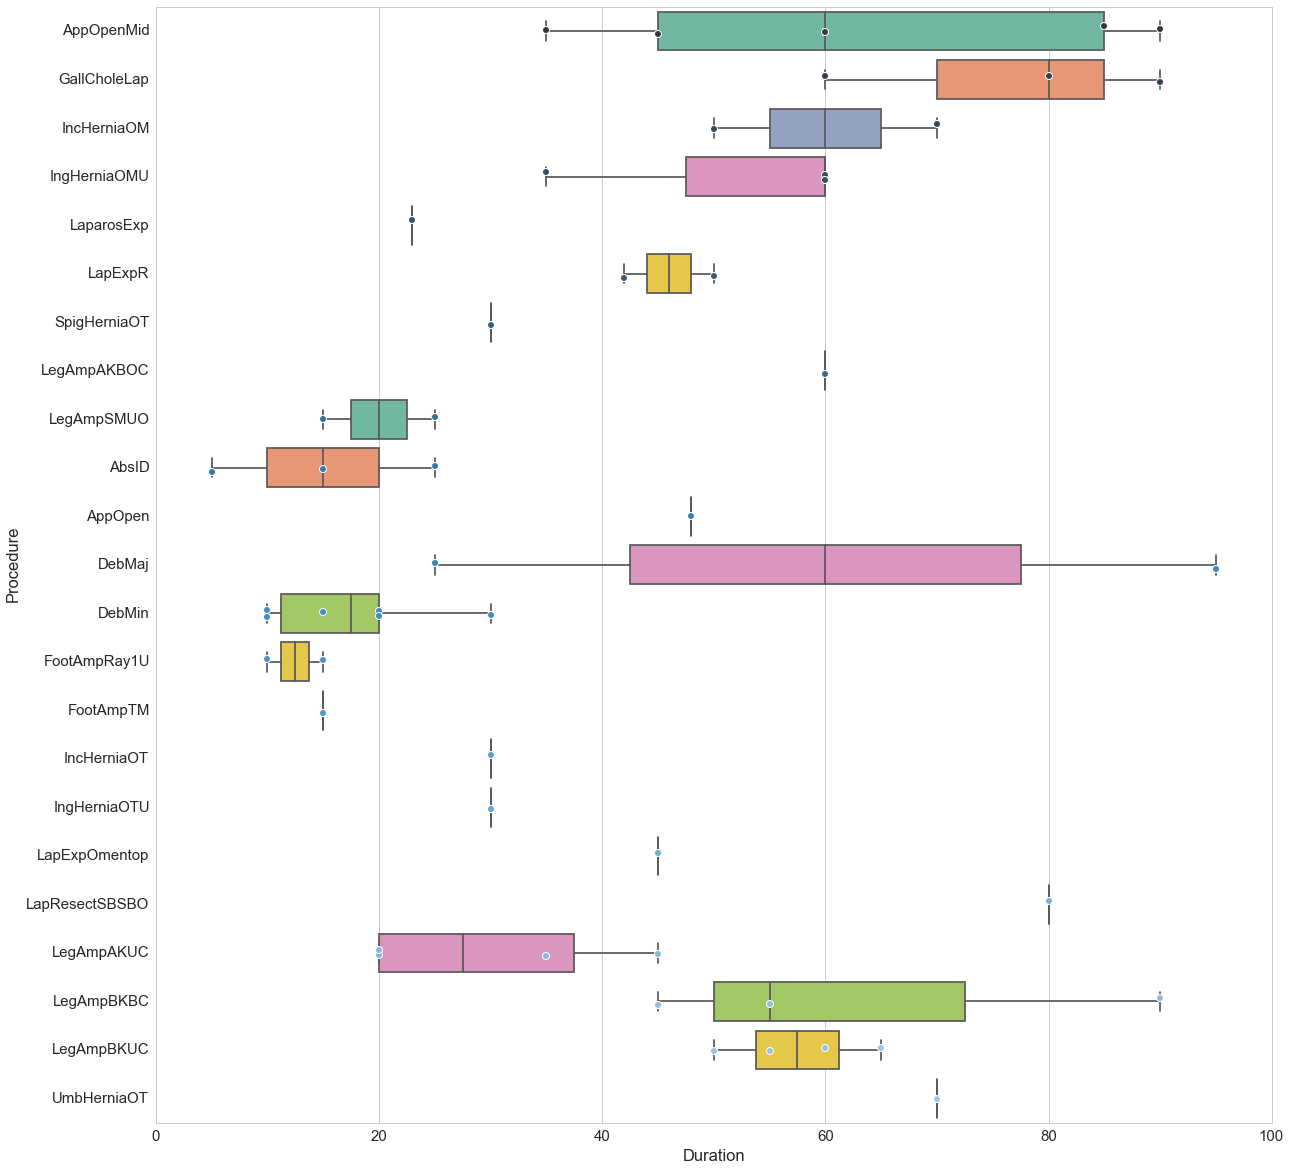

In [64]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = 'Duration', y = 'Procedure', data = data_A, orient = 'h', palette = 'Set2')
sns.stripplot(x = 'Duration', y = 'Procedure', data = data_A, orient = 'h', jitter = True, palette = 'Blues_d');

###### Dr A's performance on the Jefferson scale.

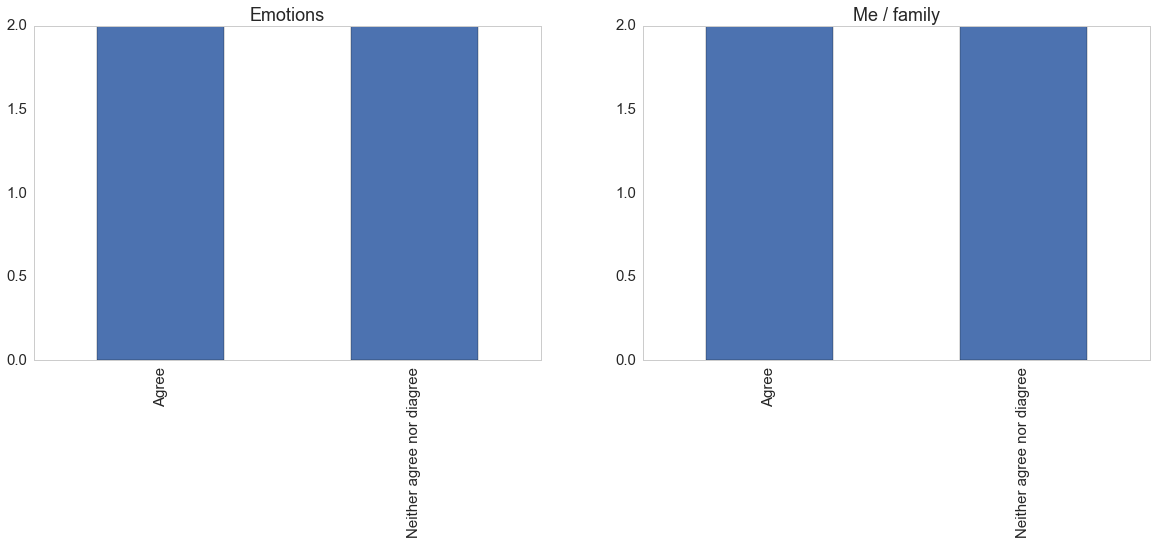

In [65]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_A['Emotions_feelings_concerns'].value_counts().plot(kind = 'bar', grid = False, title = 'Emotions')
fig.add_subplot(1, 2, 2)
jefferson_A['Me_family'].value_counts().plot(kind = 'bar', grid = False, title = 'Me / family');

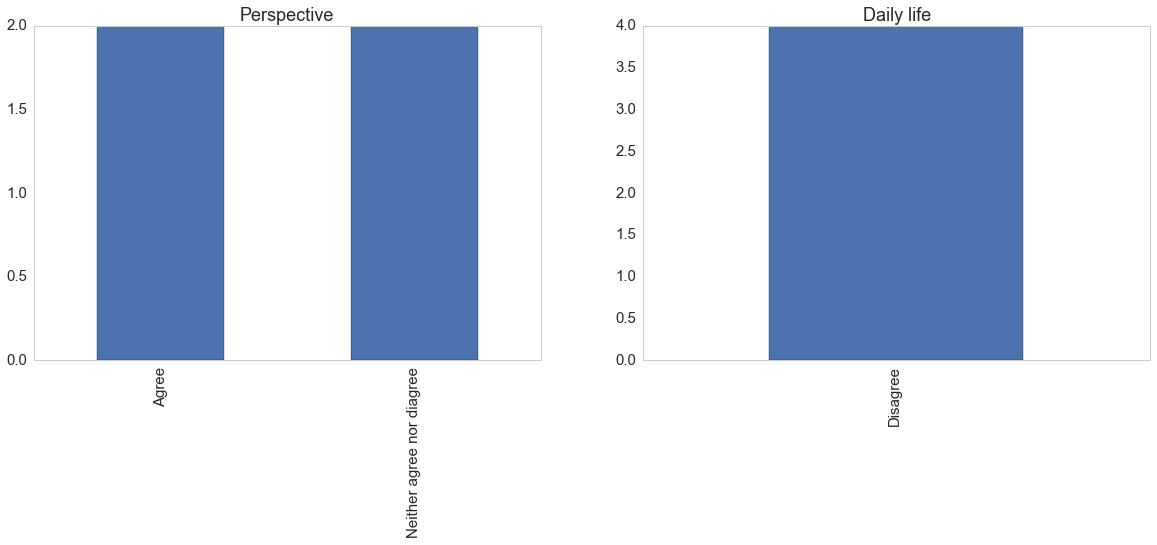

In [66]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_A['My_perspective'].value_counts().plot(kind = 'bar', grid = False, title = 'Perspective')
fig.add_subplot(1, 2, 2)
jefferson_A['Daily_life'].value_counts().plot(kind = 'bar', grid = False, title = 'Daily life');

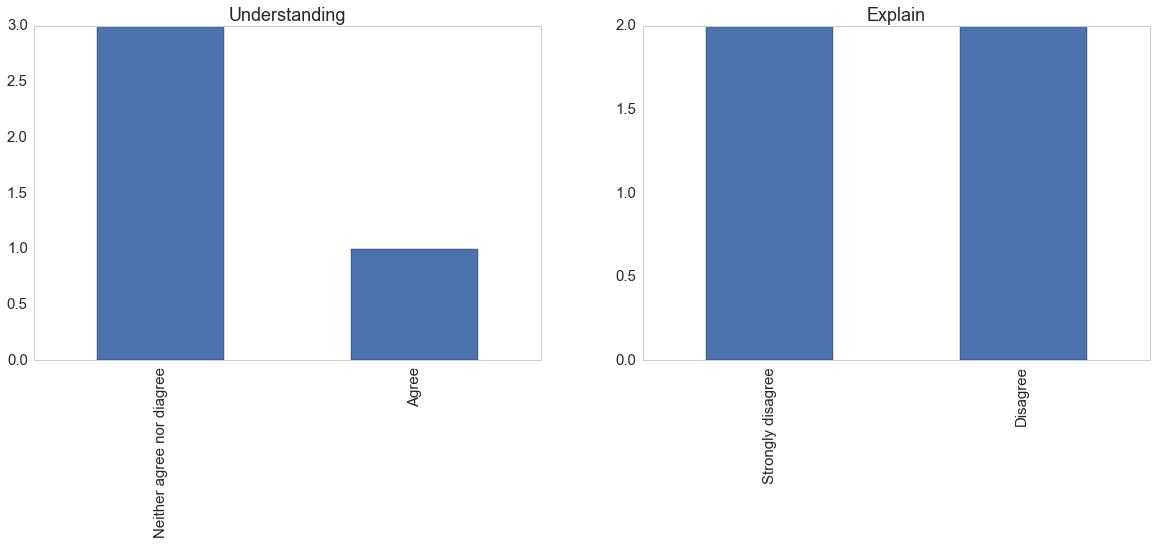

In [67]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_A['Understanding_doctor'].value_counts().plot(kind = 'bar', grid = False, title = 'Understanding')
fig.add_subplot(1, 2, 2)
jefferson_A['Condition_happen'].value_counts().plot(kind = 'bar', grid = False, title = 'Explain');

###### Dr A's performance on the modifed ward round assessment.

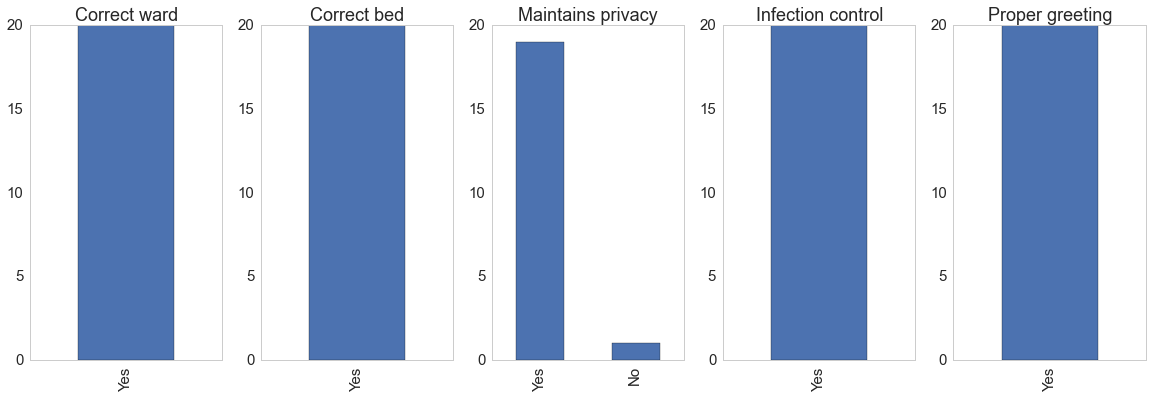

In [68]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_A['Ward'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct ward')
fig.add_subplot(1, 5, 2)
mwrat_A['Bed'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct bed')
fig.add_subplot(1, 5, 3)
mwrat_A['Privacy'].value_counts().plot(kind = 'bar', grid = False, title = 'Maintains privacy')
fig.add_subplot(1, 5, 4)
mwrat_A['Infection'].value_counts().plot(kind = 'bar', grid = False, title = 'Infection control')
fig.add_subplot(1, 5, 5)
mwrat_A['Greeting'].value_counts().plot(kind = 'bar', grid = False, title = 'Proper greeting');

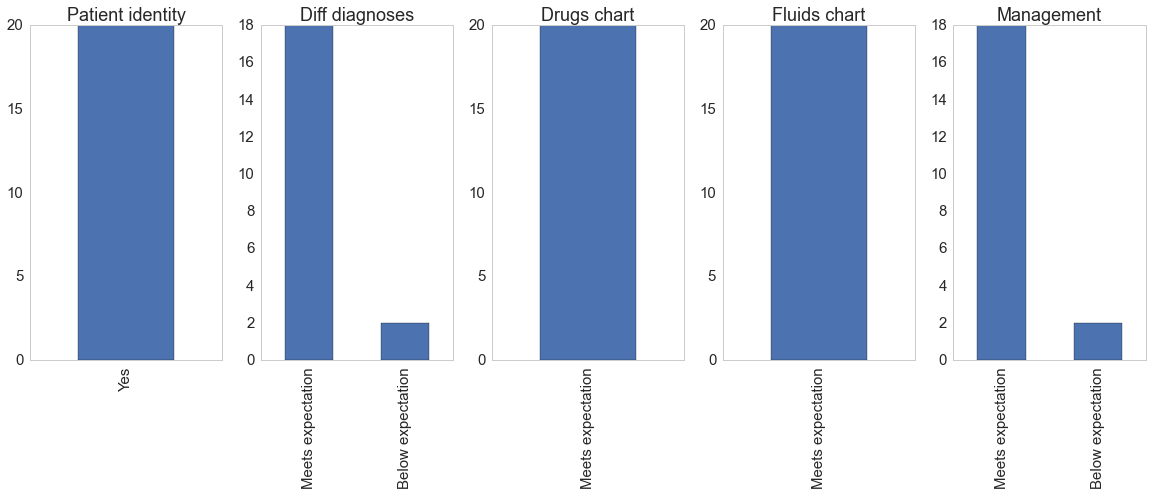

In [69]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_A['Identity'].value_counts().plot(kind = 'bar', grid = False, title = 'Patient identity')
fig.add_subplot(1, 5, 2)
mwrat_A['Diagnosis'].value_counts().plot(kind = 'bar', grid = False, title = 'Diff diagnoses')
fig.add_subplot(1, 5, 3)
mwrat_A['Drugs'].value_counts().plot(kind = 'bar', grid = False, title = 'Drugs chart')
fig.add_subplot(1, 5, 4)
mwrat_A['Fluids'].value_counts().plot(kind = 'bar', grid = False, title = 'Fluids chart')
fig.add_subplot(1, 5, 5)
mwrat_A['Management'].value_counts().plot(kind = 'bar', grid = False, title = 'Management');

### Dr B

###### A breakdown of the procedures performed by Dr B as primary surgeon.

In [70]:
data_B.Procedure.value_counts()

DebMin             6
GallCholeLap       5
IngHerniaOMU       5
LegAmpAKUC         3
AbsID              3
LapResectSBASBO    2
LegAmpBKUC         2
AppLap             2
AppLapOpen         1
WartsCaut          1
LapExpR            1
DebMaj             1
LapResectSBSBO     1
ColectomyRightO    1
LapExpHemiCR       1
FootAmpRay1U       1
AppOpen            1
Name: Procedure, dtype: int64

###### A box-and-whisker plot of the spread in the duration of the various procedures performed by Dr B.

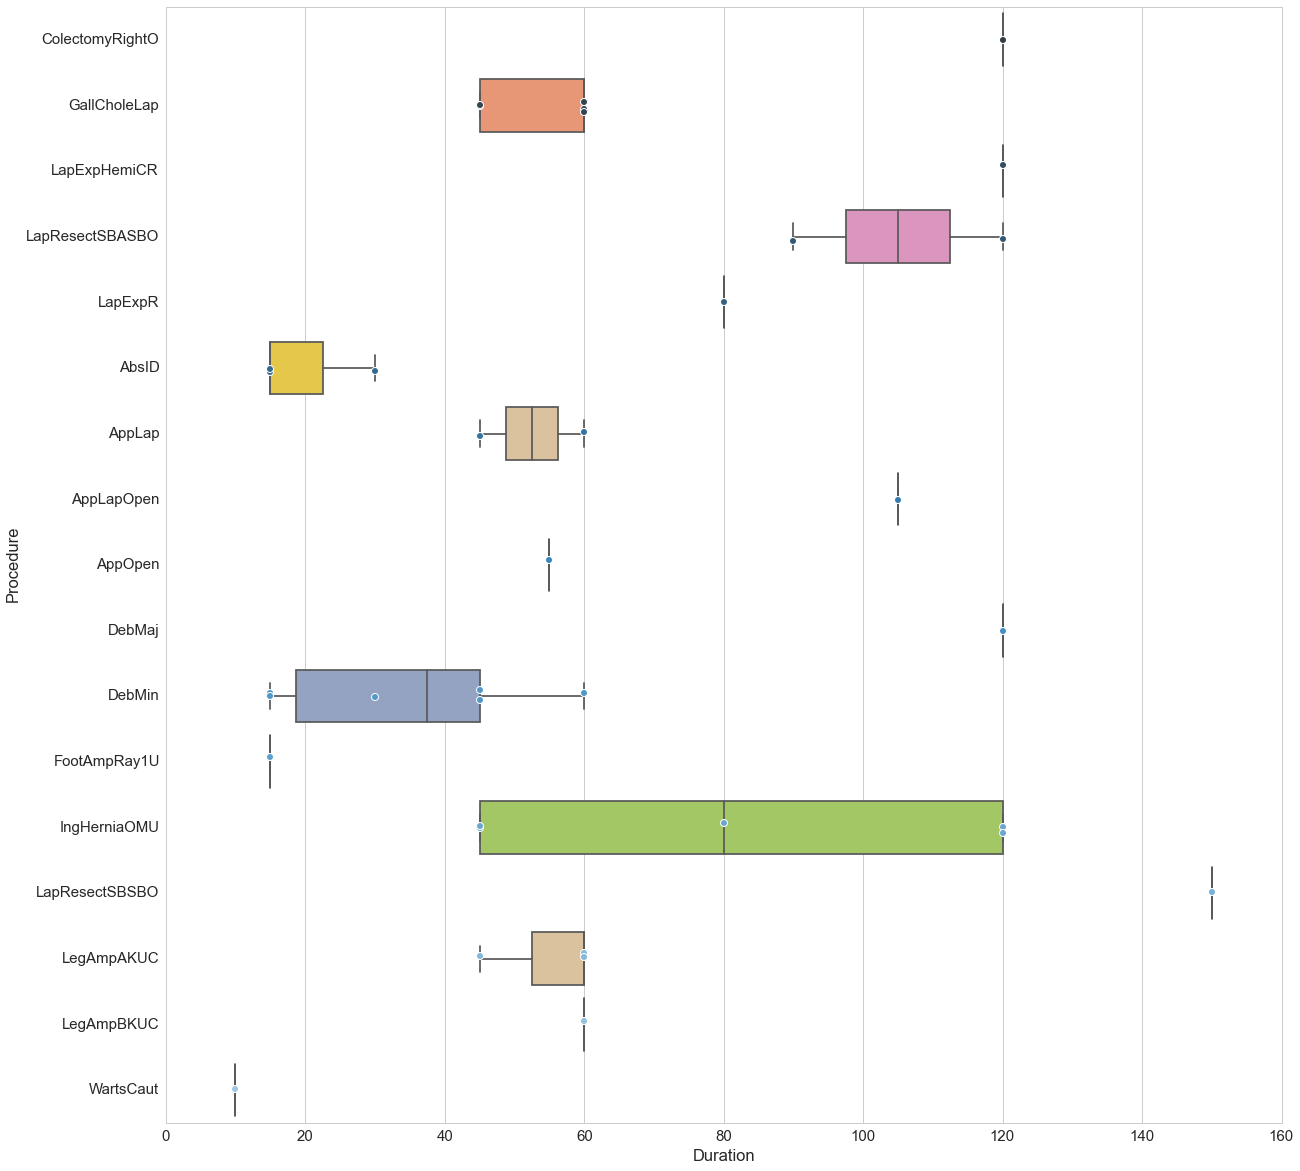

In [71]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = 'Duration', y = 'Procedure', data = data_B, orient = 'h', palette = 'Set2')
sns.stripplot(x = 'Duration', y = 'Procedure', data = data_B, orient = 'h', jitter = True, palette = 'Blues_d');

###### Dr B's performance on the Jefferson scale.

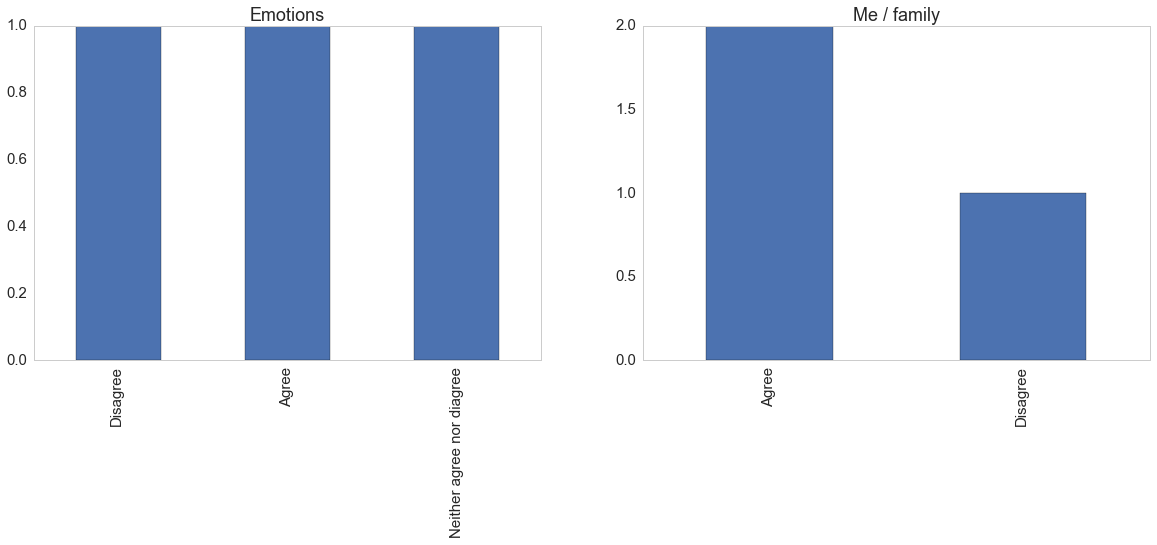

In [72]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_B['Emotions_feelings_concerns'].value_counts().plot(kind = 'bar', grid = False, title = 'Emotions')
fig.add_subplot(1, 2, 2)
jefferson_B['Me_family'].value_counts().plot(kind = 'bar', grid = False, title = 'Me / family');

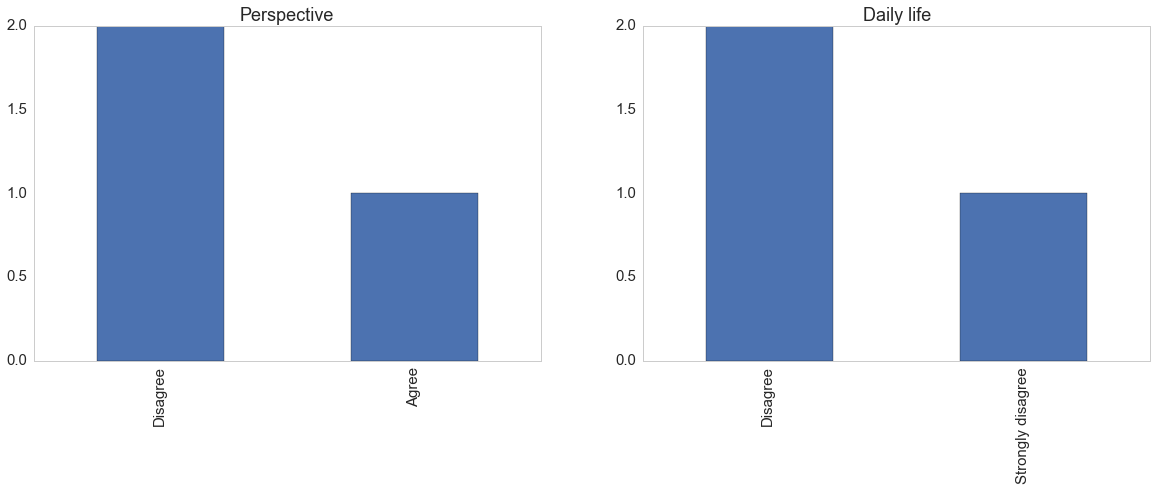

In [73]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_B['My_perspective'].value_counts().plot(kind = 'bar', grid = False, title = 'Perspective')
fig.add_subplot(1, 2, 2)
jefferson_B['Daily_life'].value_counts().plot(kind = 'bar', grid = False, title = 'Daily life');

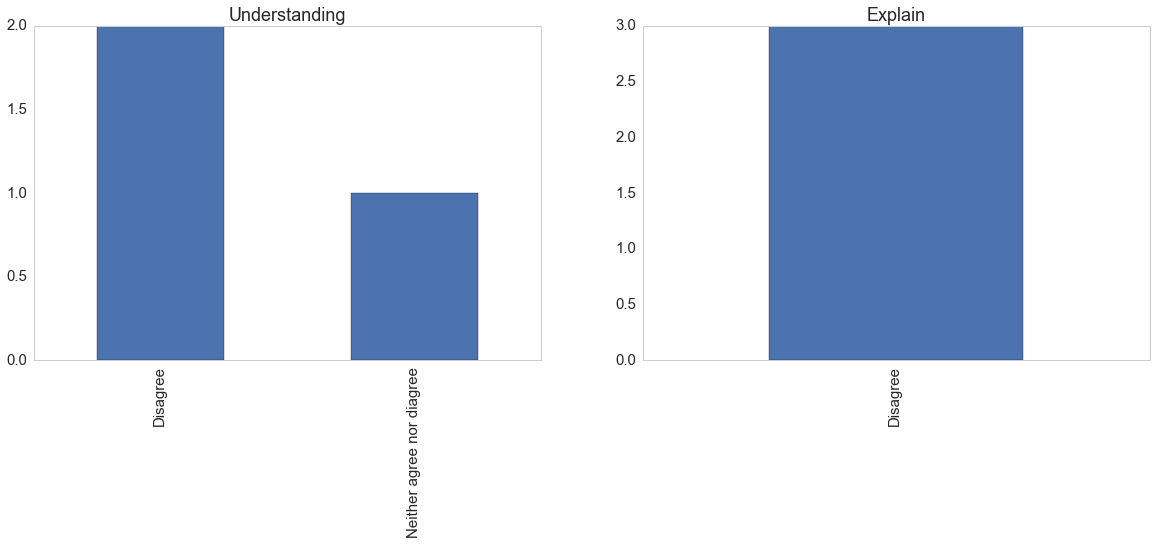

In [74]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 2, 1)
jefferson_B['Understanding_doctor'].value_counts().plot(kind = 'bar', grid = False, title = 'Understanding')
fig.add_subplot(1, 2, 2)
jefferson_B['Condition_happen'].value_counts().plot(kind = 'bar', grid = False, title = 'Explain');

###### Dr B's performance on the modifed ward round assessment.

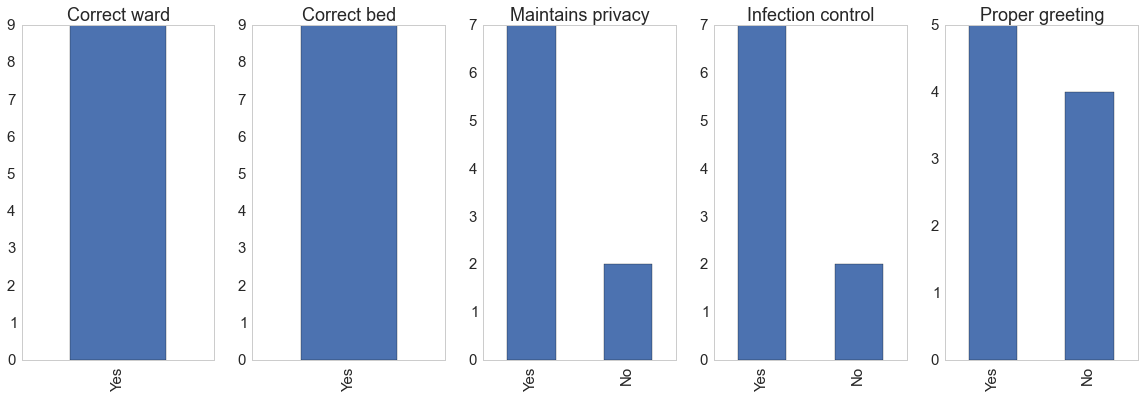

In [75]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_B['Ward'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct ward')
fig.add_subplot(1, 5, 2)
mwrat_B['Bed'].value_counts().plot(kind = 'bar', grid = False, title = 'Correct bed')
fig.add_subplot(1, 5, 3)
mwrat_B['Privacy'].value_counts().plot(kind = 'bar', grid = False, title = 'Maintains privacy')
fig.add_subplot(1, 5, 4)
mwrat_B['Infection'].value_counts().plot(kind = 'bar', grid = False, title = 'Infection control')
fig.add_subplot(1, 5, 5)
mwrat_B['Greeting'].value_counts().plot(kind = 'bar', grid = False, title = 'Proper greeting');

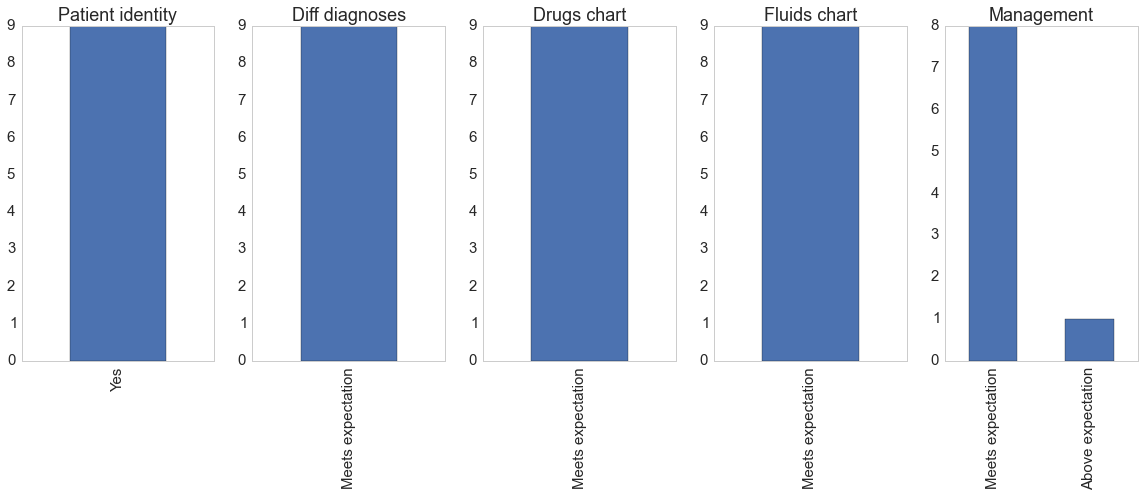

In [76]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1, 5, 1)
mwrat_B['Identity'].value_counts().plot(kind = 'bar', grid = False, title = 'Patient identity')
fig.add_subplot(1, 5, 2)
mwrat_B['Diagnosis'].value_counts().plot(kind = 'bar', grid = False, title = 'Diff diagnoses')
fig.add_subplot(1, 5, 3)
mwrat_B['Drugs'].value_counts().plot(kind = 'bar', grid = False, title = 'Drugs chart')
fig.add_subplot(1, 5, 4)
mwrat_B['Fluids'].value_counts().plot(kind = 'bar', grid = False, title = 'Fluids chart')
fig.add_subplot(1, 5, 5)
mwrat_B['Management'].value_counts().plot(kind = 'bar', grid = False, title = 'Management');